In [1]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import scipy.fftpack as ff
import scipy.stats as ss
import scipy.optimize as sop

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Зачитываем и мерджим данные

In [3]:
ingnored_dates = set([dt.date(2015, 3, 7), dt.date(2015, 3, 8), dt.date(2015, 2, 13), dt.date(2015, 2, 14), dt.date(2015, 1, 6), dt.date(2015, 1, 7), dt.date(2015, 4, 11), 
                  dt.date(2015, 4, 12), dt.date(2015, 2, 22), dt.date(2015, 2, 23), dt.date(2015, 5, 8), dt.date(2015, 5, 9), dt.date(2015, 1, 25), dt.date(2015, 1, 18), 
                  dt.date(2015, 1, 19), dt.date(2015, 3, 31), dt.date(2015, 4, 1), dt.date(2015, 6, 20), dt.date(2015, 6, 21), dt.date(2015, 7, 8), dt.date(2015, 5, 11), 
                  dt.date(2015, 5, 12), dt.date(2015, 7, 11), dt.date(2015, 1, 13), dt.date(2015, 1, 14), dt.date(2015, 4, 30), dt.date(2015, 5, 1), dt.date(2015, 11, 29), 
                  dt.date(2015, 2, 20), dt.date(2015, 10, 5), dt.date(2015, 5, 15), dt.date(2015, 3, 26), dt.date(2015, 5, 28), dt.date(2015, 10, 25), dt.date(2015, 1, 1), 
                  dt.date(2015, 11, 10), dt.date(2015, 11, 21), dt.date(2015, 9, 1), dt.date(2015, 6, 1), dt.date(2015, 7, 25), dt.date(2015, 6, 12), dt.date(2015, 8, 9), 
                  dt.date(2015, 2, 17), dt.date(2015, 9, 27), dt.date(2015, 7, 31), dt.date(2015, 3, 27), dt.date(2015, 9, 28)])

dates = [dt.date(2015, 10, 1) + dt.timedelta(days=i) for i in xrange(30)]

dates_test_1 = [dt.date(2015, 11, 1) + dt.timedelta(days=i) for i in xrange(7)]
dates_test_2 = [dt.date(2015, 11, 7) + dt.timedelta(days=i) for i in xrange(7)]
dates_test_3 = [dt.date(2015, 11, 14) + dt.timedelta(days=i) for i in xrange(7)]
dates_test_4 = [dt.date(2015, 11, 21) + dt.timedelta(days=i) for i in xrange(7)]

In [4]:
lines = []
lines_test_1 = []
lines_test_2 = []
lines_test_3 = []
lines_test_4 = []

with open("/Users/anokhin/Desktop/presents_2015_1x_N_1M.txt") as tlf:
    for line in tlf:
        uid, json_str = line.strip().split("\t")
                
        json = ujson.loads(json_str)
        
        data = {"uid": uid}
        data_test_1 = {"uid": uid}
        data_test_2 = {"uid": uid}
        data_test_3 = {"uid": uid}
        data_test_4 = {"uid": uid}
        
        for day, stats in json:            
            date = dt.datetime.strptime(day, "%Y%m%d").date()
            
            if date in ingnored_dates:
                continue            
            
            for price_str, count in stats.iteritems():
                price = int(price_str)
                if date in dates:
                    data[price] = data.get(price, 0) + count
                elif date in dates_test_1:
                    data_test_1[price] = data_test_1.get(price, 0) + count
                elif date in dates_test_2:
                    data_test_2[price] = data_test_2.get(price, 0) + count
                elif date in dates_test_3:
                    data_test_3[price] = data_test_3.get(price, 0) + count
                elif date in dates_test_4:
                    data_test_4[price] = data_test_4.get(price, 0) + count
                
        lines.append(data)
        lines_test_1.append(data_test_1)
        lines_test_2.append(data_test_2)
        lines_test_3.append(data_test_3)
        lines_test_4.append(data_test_4)
        
df_price = pd.DataFrame(lines, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)
df_price_test_1 = pd.DataFrame(lines_test_1, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)
df_price_test_2 = pd.DataFrame(lines_test_2, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)
df_price_test_3 = pd.DataFrame(lines_test_3, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)
df_price_test_4 = pd.DataFrame(lines_test_4, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)

df_price.head()

1    2    3    4    5    6    7    8    9    10  ...   91   \
uid                                                              ...         
N:477572420068    0    0    0    0    0    0    0    0    0    0 ...     0   
N:540871725975    7    0    1    0    1    0    0    0    0    0 ...     0   
N:535924413189    0    0    0    0    0    0    0    0    0    0 ...     0   
N:552389804601    0    0    0    0    0    0    0    0    0    0 ...     0   
N:557086936215    9    0    0    0    0    0    0    0    0    0 ...     0   

                92   93   94   95   96   97   98   99   100  
uid                                                          
N:477572420068    0    0    0    0    0    0    0    0    0  
N:540871725975    0    0    0    0    0    0    0    0    0  
N:535924413189    0    0    0    0    0    0    0    0    0  
N:552389804601    0    0    0    0    0    0    0    0    0  
N:557086936215    0    0    0    0    0    0    0    0    0  

[5 rows x 100 columns]

In [5]:
lines = []
lines_test_1 = []
lines_test_2 = []
lines_test_3 = []
lines_test_4 = []

with open("/Users/anokhin/Desktop/targets_20151x.txt") as tarf:
    for line in tarf:        
        uid, json_str = line.strip().split("\t")    
        
        data = {"uid": "N:" + uid}
        data_test_1 = {"uid": "N:" + uid}
        data_test_2 = {"uid": "N:" + uid}
        data_test_3 = {"uid": "N:" + uid}
        data_test_4 = {"uid": "N:" + uid}
        
        for feature, f_dates in ujson.loads(json_str):
            for day in f_dates:
                date = dt.datetime.strptime(day, "%Y-%m-%d").date()
                
                if date in ingnored_dates:
                    continue
                    
                if date in dates:
                    data[feature] = data.get(feature, 0) + 1
                elif date in dates_test_1:
                    data_test_1[feature] = data_test_1.get(feature, 0) + 1
                elif date in dates_test_2:
                    data_test_2[feature] = data_test_2.get(feature, 0) + 1
                elif date in dates_test_3:
                    data_test_3[feature] = data_test_3.get(feature, 0) + 1
                elif date in dates_test_4:
                    data_test_4[feature] = data_test_4.get(feature, 0) + 1               
            
        lines.append(data)
        lines_test_1.append(data_test_1)
        lines_test_2.append(data_test_2)
        lines_test_3.append(data_test_3)
        lines_test_4.append(data_test_4)
        
#         if len(lines) == 30000:
#             break
                
df_targets = pd.DataFrame(lines).set_index(['uid']).fillna(0)
df_targets_test_1 = pd.DataFrame(lines_test_1).set_index(['uid']).fillna(0)
df_targets_test_2 = pd.DataFrame(lines_test_2).set_index(['uid']).fillna(0)
df_targets_test_3 = pd.DataFrame(lines_test_3).set_index(['uid']).fillna(0)
df_targets_test_4 = pd.DataFrame(lines_test_4).set_index(['uid']).fillna(0)

df_targets.head()

A:10012  A:10013  A:10014  A:10015  A:10053  A:10249  A:10251  \
uid                                                                             
N:101458956738        0        0        0        0        0        9        0   
N:117279463355        0        0        0        0        0        0        0   
N:125895441550        0        0        0        7        0       18        0   
N:143019654895        0        0        0       23        0        5        0   
N:144339833090        0        0        0       20        1       16        0   

                A:10252  A:10254  A:10255  ...    inc:1  inc:2  inc:3  inc:4  \
uid                                        ...                                 
N:101458956738        0        0        0  ...        9     26      2      0   
N:117279463355        0        0        0  ...        0      0      0      0   
N:125895441550        0        0        0  ...        0     18      7     14   
N:143019654895        0        0        0  ...        0     13      1      1   
N:144339833090        0        0        0  ...        4     14      9      0   

                inc:5  is_male:False  is_male:True  ltv:1  ltv:2  ltv:3  
uid                                                                      
N:101458956738      0             27             2      9     26      8  
N:117279463355      0              0             0      0      0      0  
N:125895441550      0             26            22      0     23     13  
N:143019654895     13              4            24      0     24      0  
N:144339833090      0             20             0      0     12     10  

[5 rows x 338 columns]

Удаляем все, что меньше 10000 пользователей

In [6]:
MIN_HITS_PER_FEATURE = 7
MIN_USERS_PER_FEATURE = df_targets.shape[0] / 10

feature_counts = pd.Series(np.sum(df_targets.values > MIN_HITS_PER_FEATURE, axis=0), index=df_targets.columns)
selected_features = [f for f in feature_counts.index if not f.startswith("A:") or feature_counts[f] > MIN_USERS_PER_FEATURE]
df_targets = df_targets[selected_features]
df_targets.head()

A:10013  A:10015  A:10249  A:10881  A:11053  A:11452  A:11453  \
uid                                                                             
N:101458956738        0        0        9        0        0        0        0   
N:117279463355        0        0        0        0        0        0        0   
N:125895441550        0        7       18        5        0       13        0   
N:143019654895        0       23        5        4        0        0        0   
N:144339833090        0       20       16        0        5        0        0   

                A:11454  A:12920  A:12921  ...    inc:1  inc:2  inc:3  inc:4  \
uid                                        ...                                 
N:101458956738        0       27        5  ...        9     26      2      0   
N:117279463355        0        0        0  ...        0      0      0      0   
N:125895441550        0       27        0  ...        0     18      7     14   
N:143019654895        0        0       24  ...        0     13      1      1   
N:144339833090        0        5       19  ...        4     14      9      0   

                inc:5  is_male:False  is_male:True  ltv:1  ltv:2  ltv:3  
uid                                                                      
N:101458956738      0             27             2      9     26      8  
N:117279463355      0              0             0      0      0      0  
N:125895441550      0             26            22      0     23     13  
N:143019654895     13              4            24      0     24      0  
N:144339833090      0             20             0      0     12     10  

[5 rows x 105 columns]

In [7]:
df = pd.merge(df_price, df_targets, left_index=True, right_index=True)

df_test_1 = pd.merge(df_price_test_1, df_targets_test_1, left_index=True, right_index=True)
df_test_2 = pd.merge(df_price_test_2, df_targets_test_2, left_index=True, right_index=True)
df_test_3 = pd.merge(df_price_test_3, df_targets_test_3, left_index=True, right_index=True)
df_test_4 = pd.merge(df_price_test_4, df_targets_test_4, left_index=True, right_index=True)

df.head()

1  2  3  4  5  6  7  8  9  10  ...    inc:1  inc:2  inc:3  \
uid                                             ...                          
N:101458956738   0  0  0  0  2  0  0  0  0   0  ...        9     26      2   
N:117279463355   7  0  0  0  0  0  0  0  0   0  ...        0      0      0   
N:125895441550  10  1  2  0  1  0  0  0  0   0  ...        0     18      7   
N:143019654895   0  0  0  0  0  0  0  0  0   0  ...        0     13      1   
N:144339833090  16  0  1  0  2  0  0  0  0   0  ...        4     14      9   

                inc:4  inc:5  is_male:False  is_male:True  ltv:1  ltv:2  ltv:3  
uid                                                                             
N:101458956738      0      0             27             2      9     26      8  
N:117279463355      0      0              0             0      0      0      0  
N:125895441550     14      0             26            22      0     23     13  
N:143019654895      1     13              4            24      0     24      0  
N:144339833090      0      0             20             0      0     12     10  

[5 rows x 205 columns]

## Исследуем признаки на пригодность

In [8]:
targets = {}
with open('/Users/anokhin/Desktop/features.txt') as ff:
    for line in ff:
        t_id, t_name = line.strip().split(":", 1)
        targets["A:" + t_id] = t_name

A:10013 / Красота и здоровье / 80628 14427


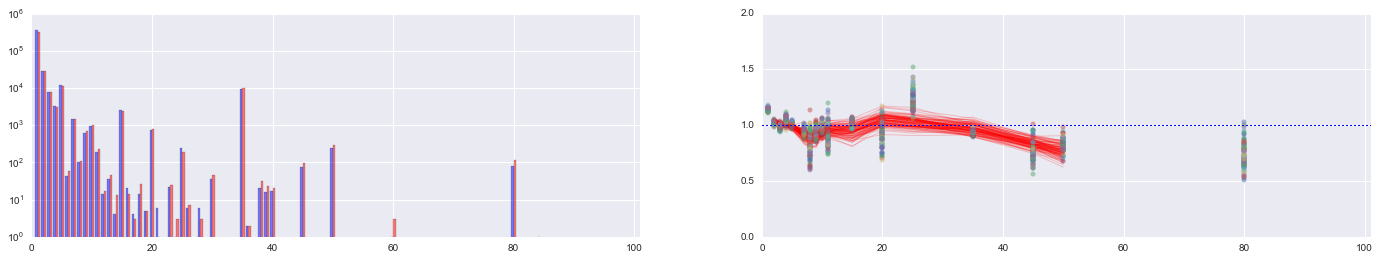

A:10015 / Юмор / 33530 61525


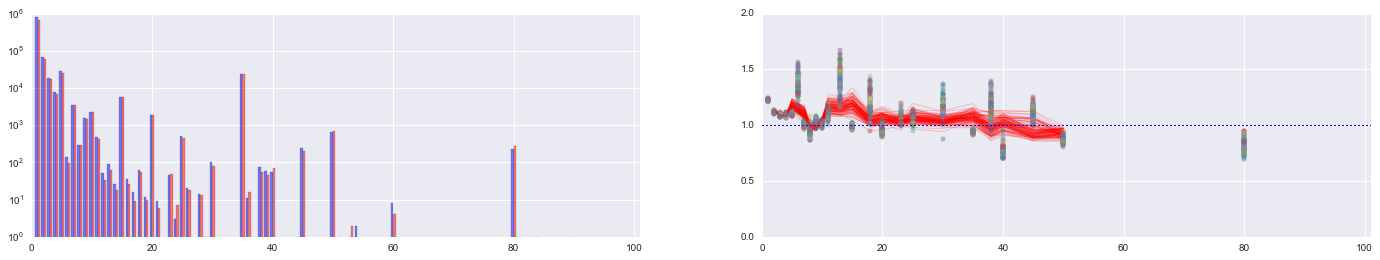

A:10249 / Бытовая техника / 78008 17047


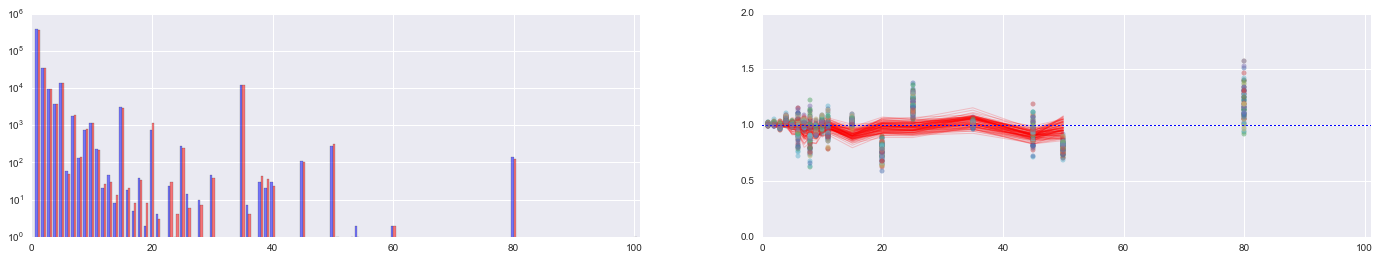

A:10881 / Онлайн видео / 80226 14829


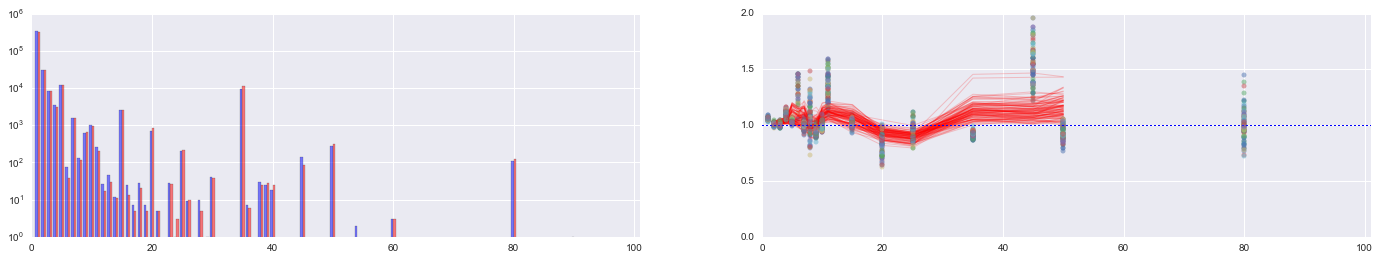

A:11053 / Аллергия, астма / 81783 13272


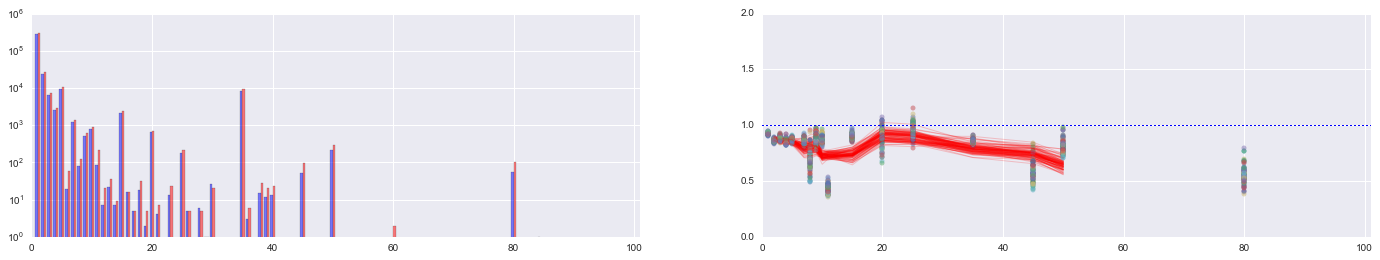

A:11452 / Видео: firstQuartile (50%) / 55531 39524


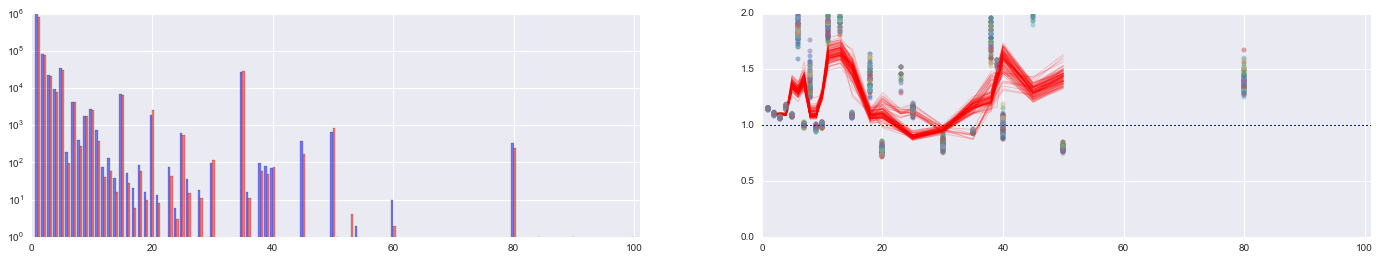

A:11453 / Видео: firstQuartile (75%) / 65125 29930


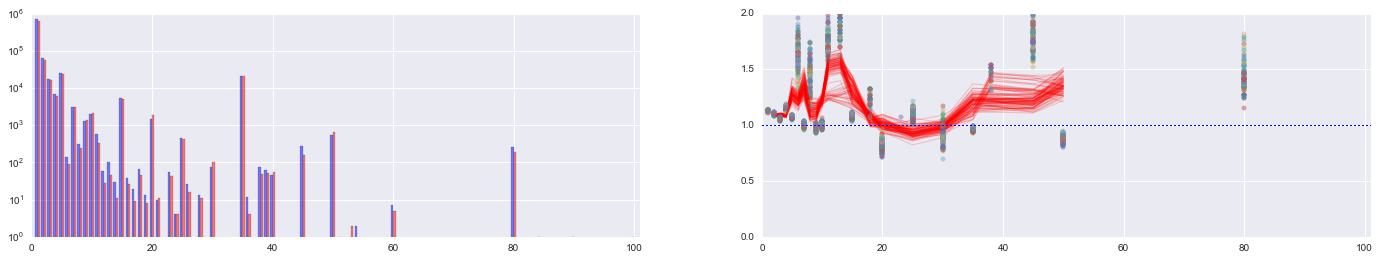

A:11454 / Видео: firstQuartile (100%) / 72867 22188


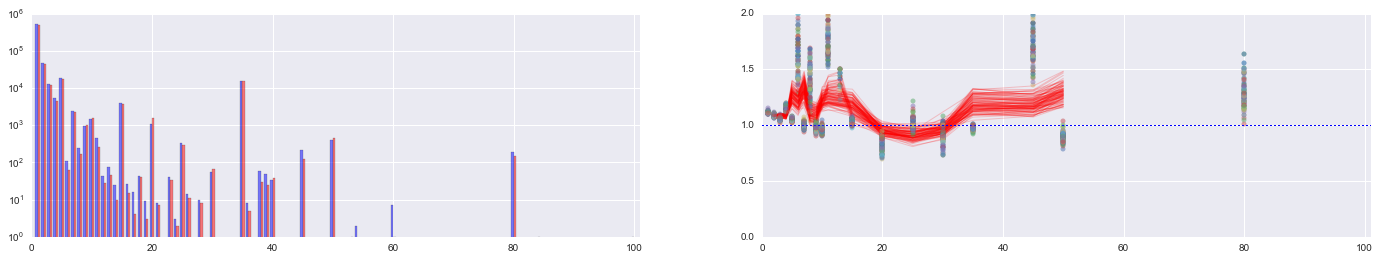

A:12920 / Есть дети в семье / 46704 48351


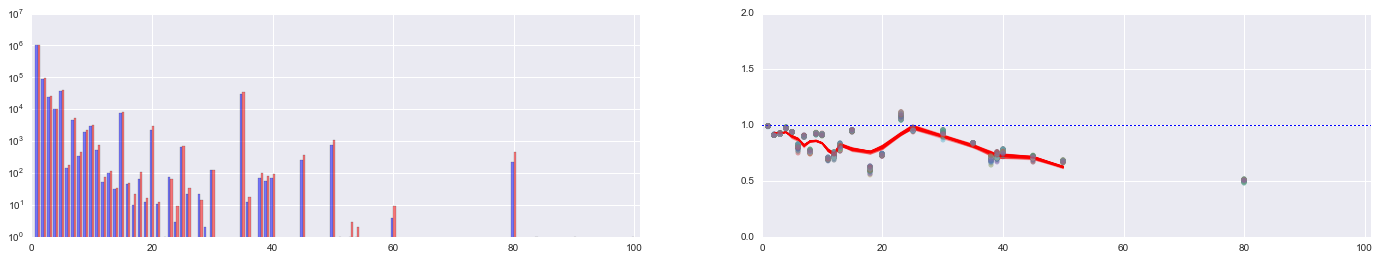

A:12921 / Нет детей в семье / 53038 42017


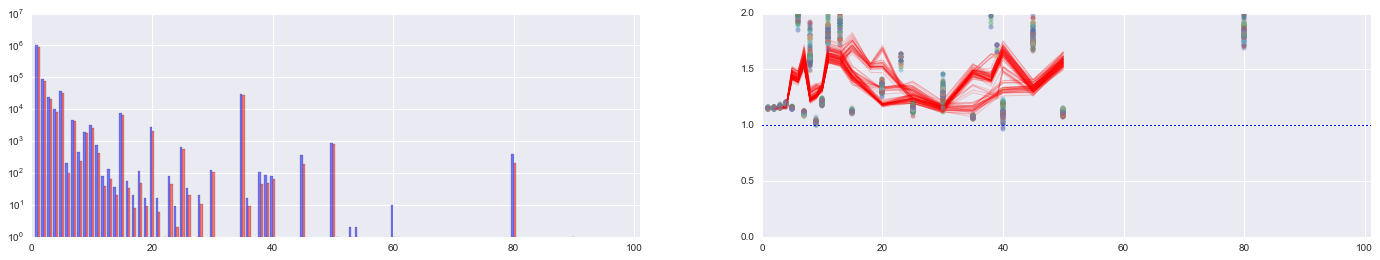

A:7353 / Авто средний класс / 83990 11065


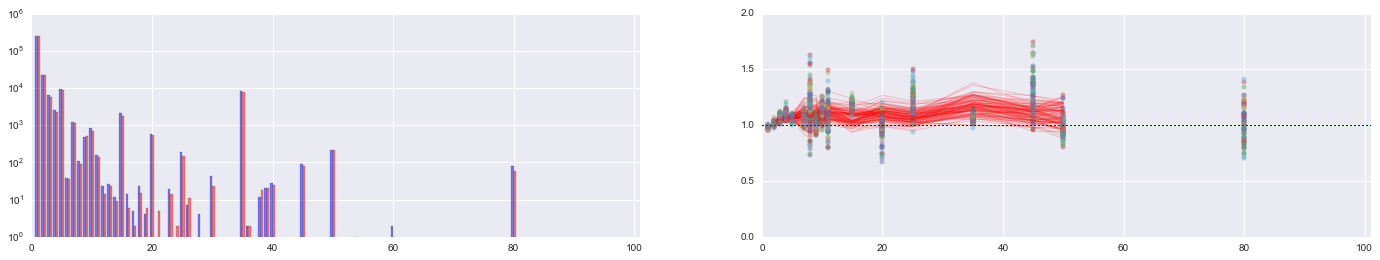

A:7354 / Автовладельцы / 70901 24154


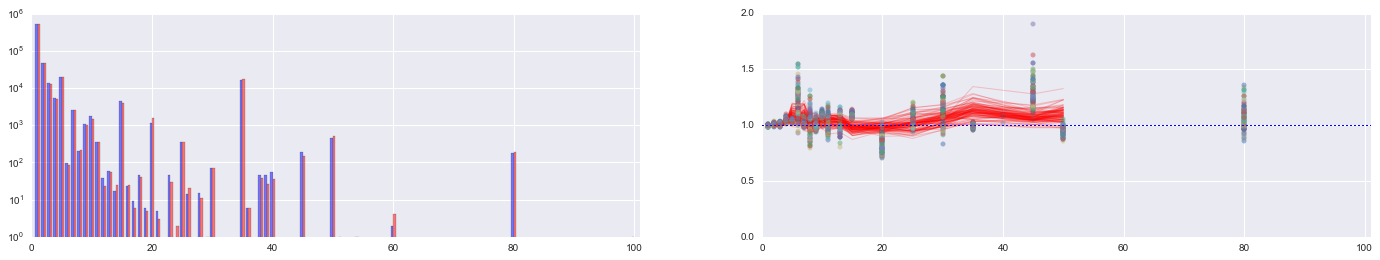

A:7356 / Авто эконом класс / 84276 10779


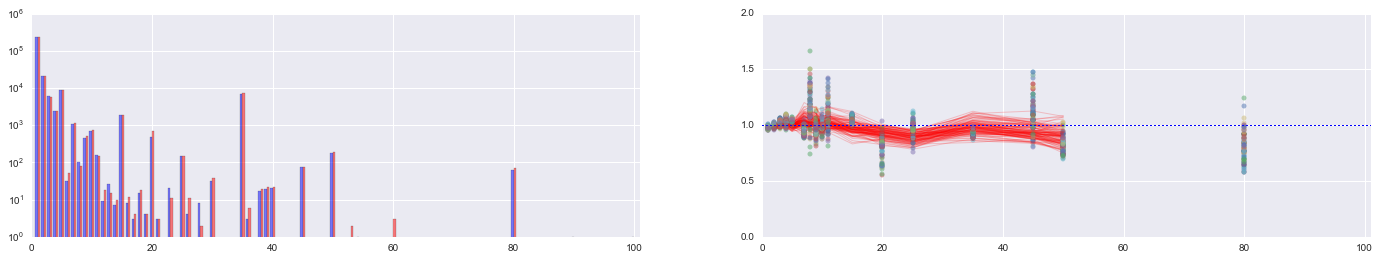

A:7358 / Сотовые телефоны и гарнитура / 81483 13572


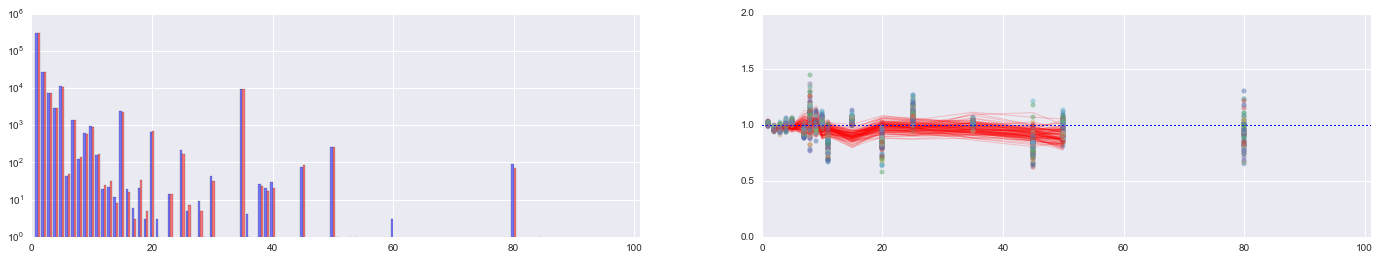

A:7361 / Женская одежда / 80025 15030


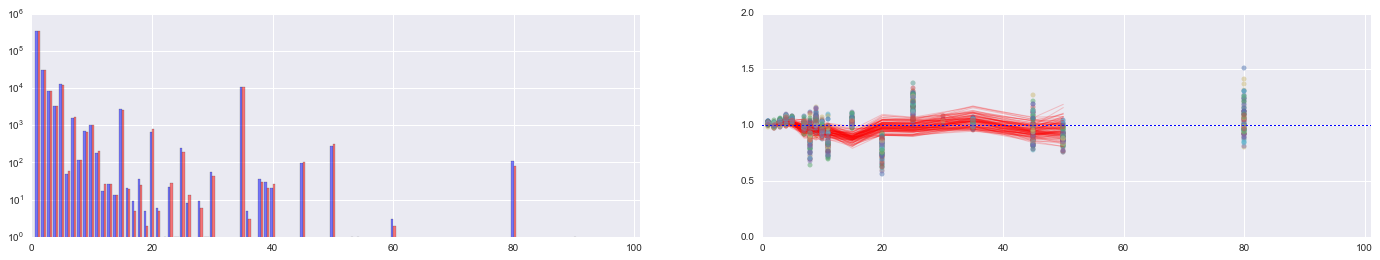

A:7369 / Компьютеры и комплектующие / 84666 10389


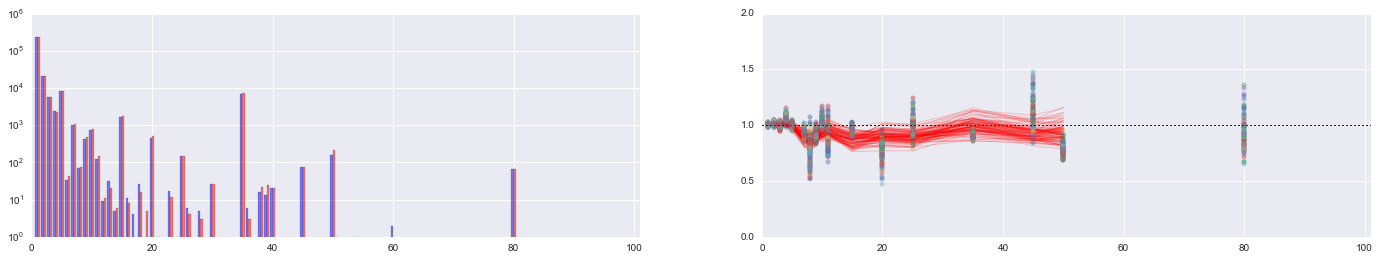

A:7371 / Программное обеспечение / 83989 11066


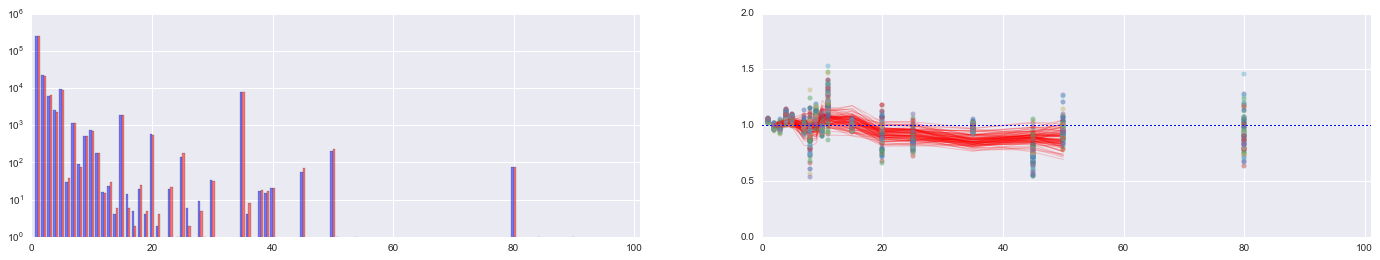

A:7374 / Мебель и интерьер / 80894 14161


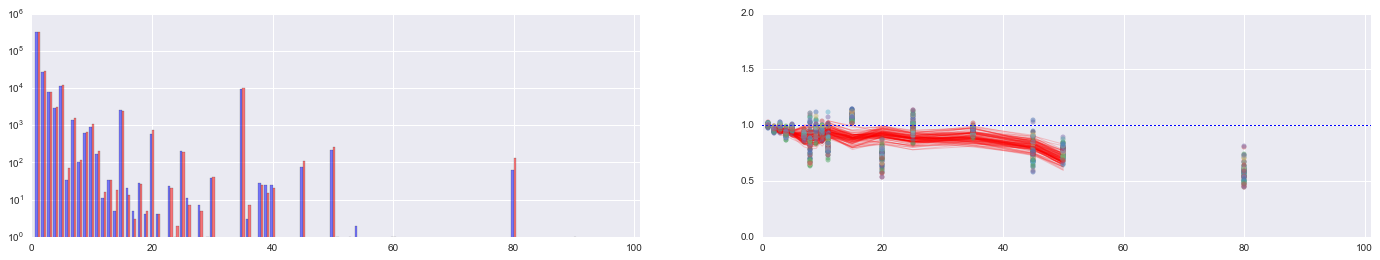

A:7376 / Строительство и ремонт / 77765 17290


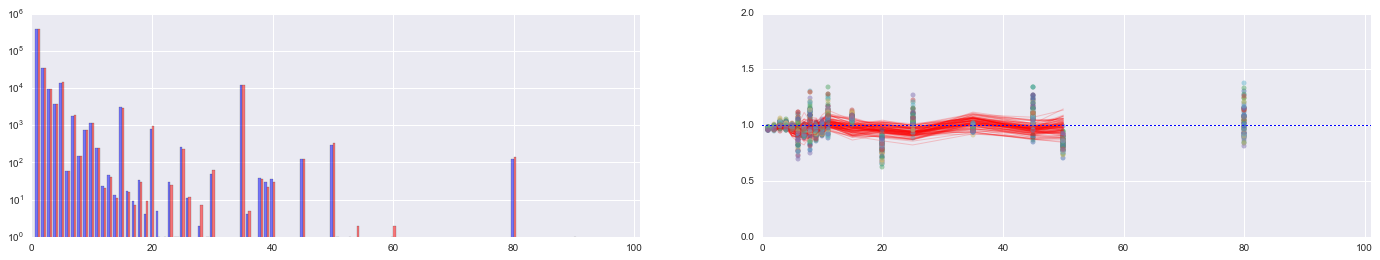

A:7377 / Детские товары / 75037 20018


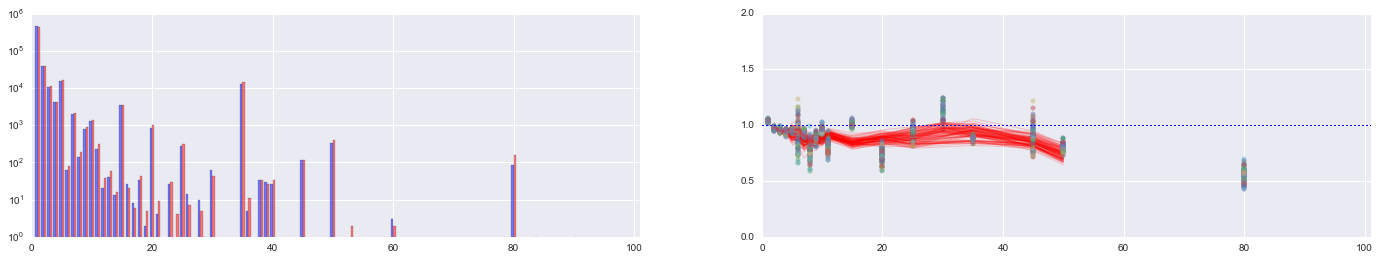

A:7387 / Кинофильмы / 67501 27554


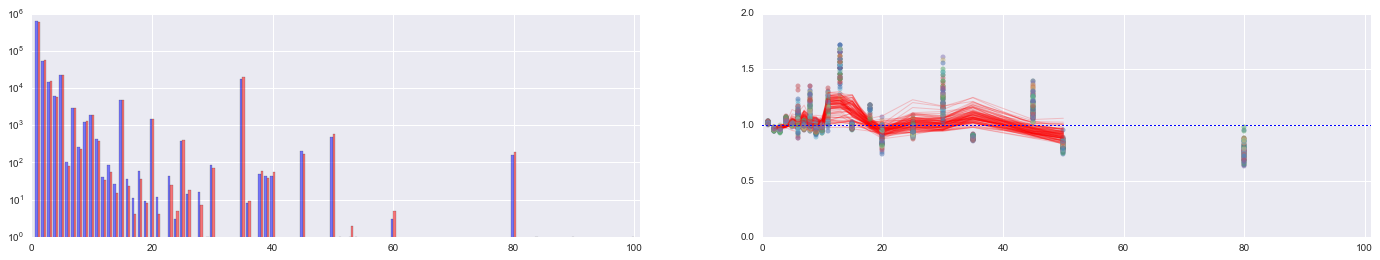

A:7388 / Культурный отдых, афиша / 72759 22296


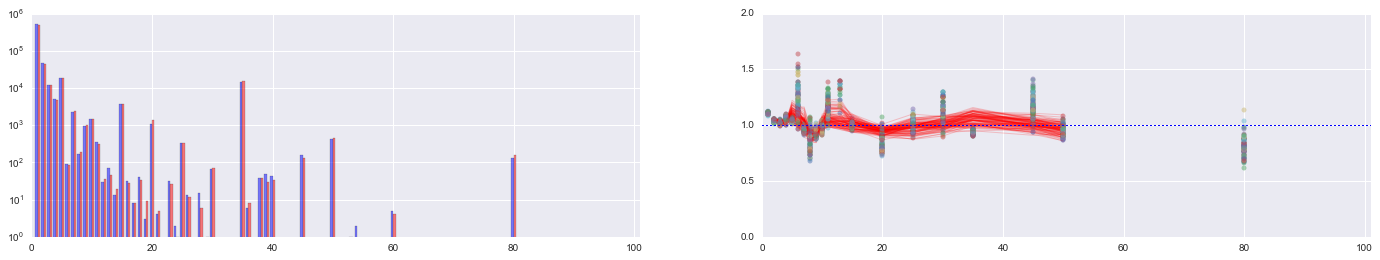

A:7394 / Активный отдых / 71191 23864


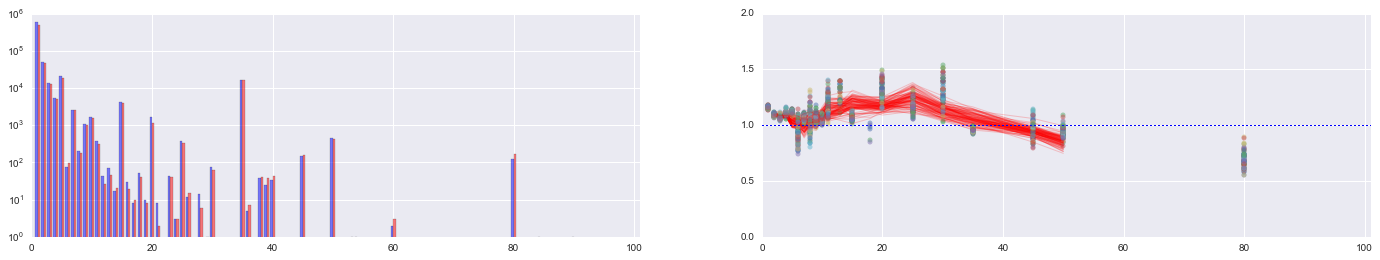

A:7395 / Продукты питания / 81155 13900


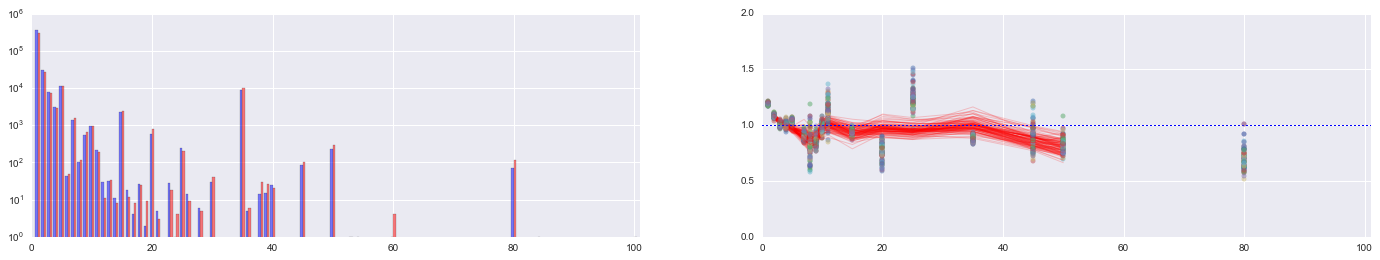

A:7403 / Банки, банковские услуги / 76232 18823


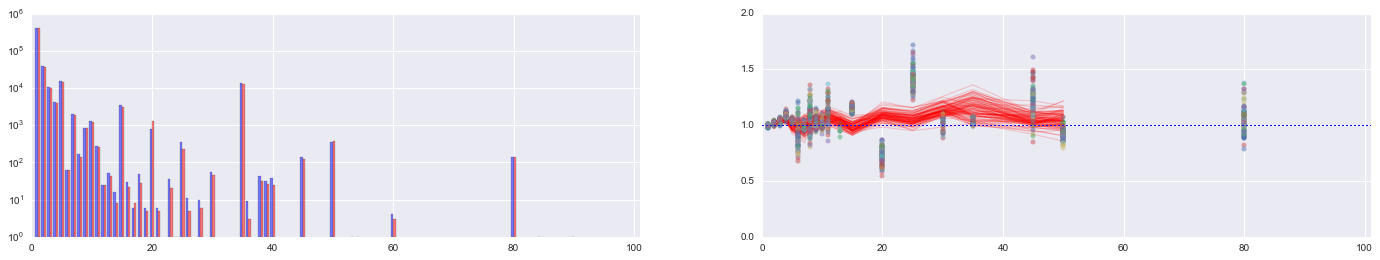

A:7404 / Котировки, фондовые рынки / 82388 12667


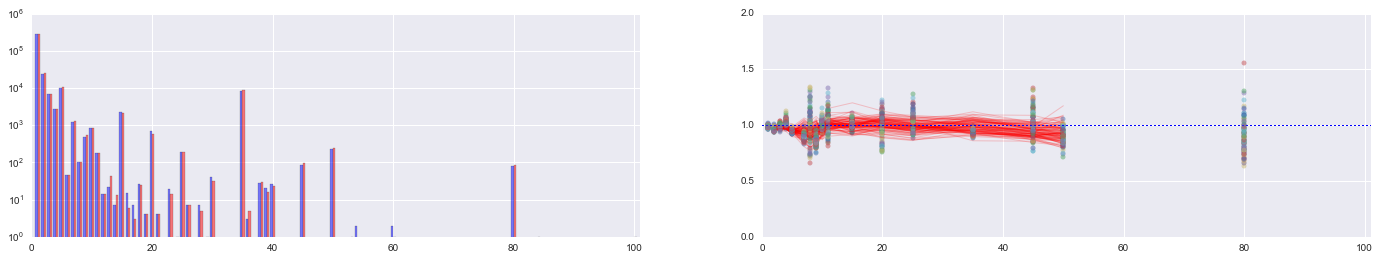

A:7407 / Авиабилеты и железнодорожные билеты / 80366 14689


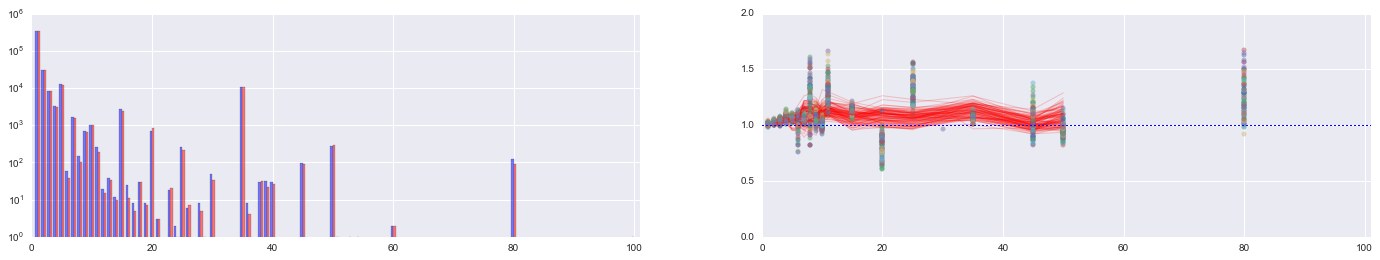

A:7408 / Путешественники внутренние / 75417 19638


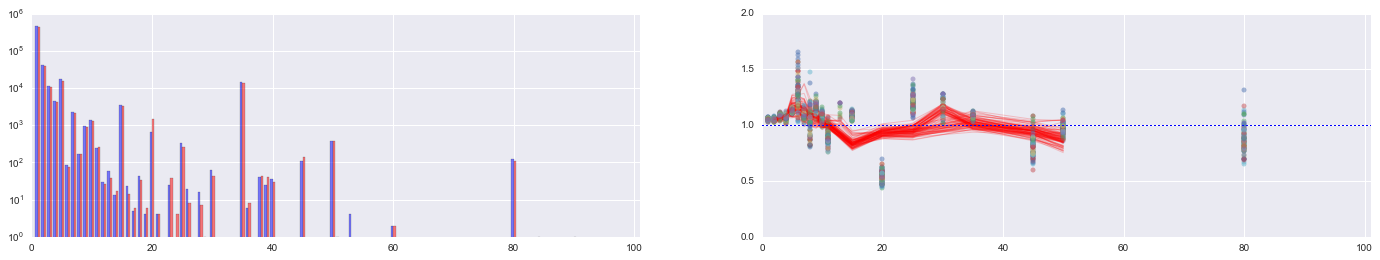

A:7410 / Туры и турагентства / 76628 18427


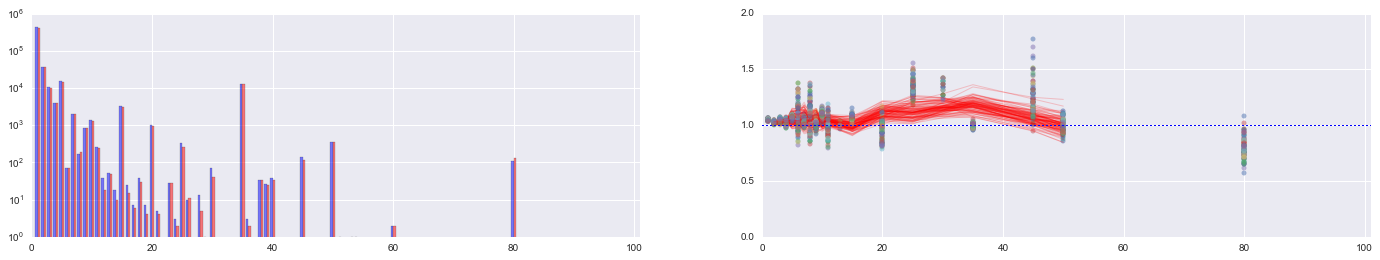

A:7412 / Дома, коттеджи и земельные участки / 78722 16333


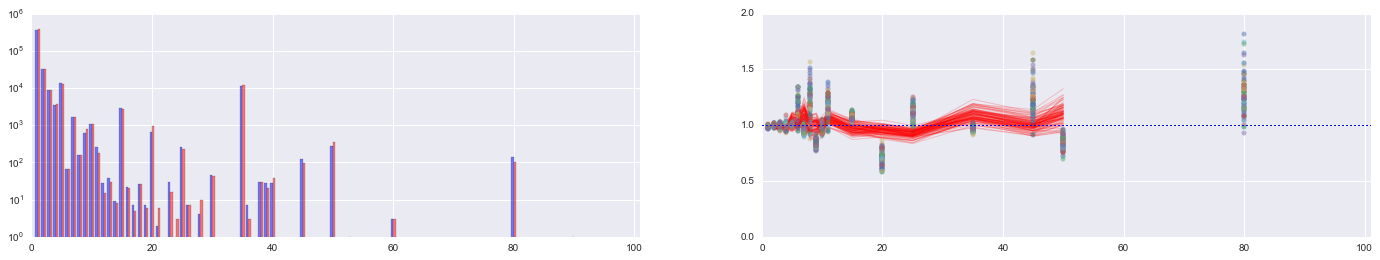

A:7414 / Вторичная недвижимость / 70189 24866


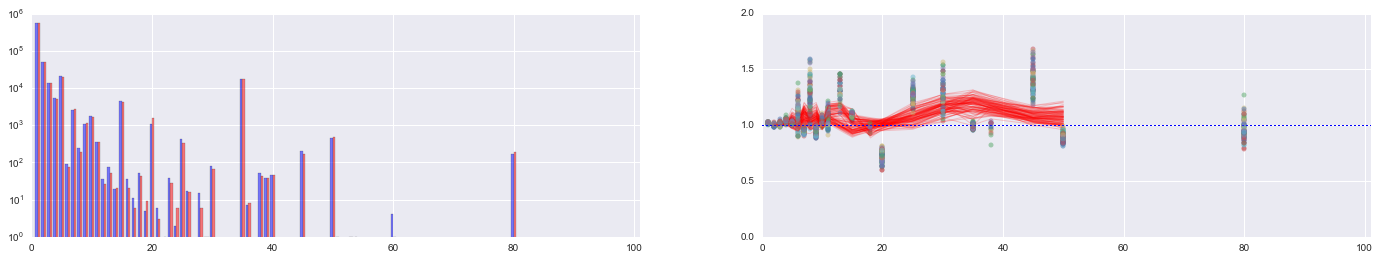

A:7415 / Аптеки и лекарства / 74097 20958


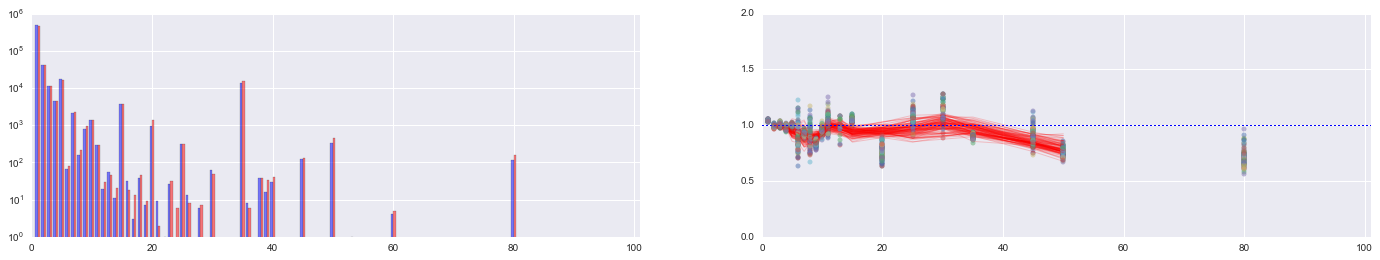

A:7417 / Клиники / 71062 23993


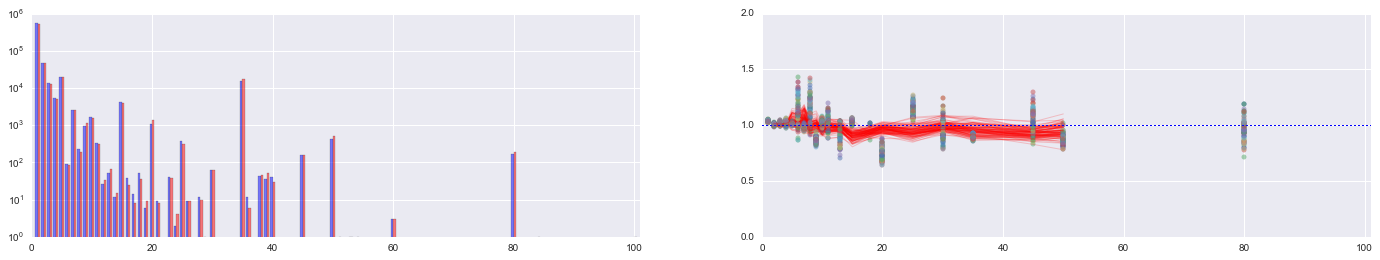

A:7421 / Все о детях / 39854 55201


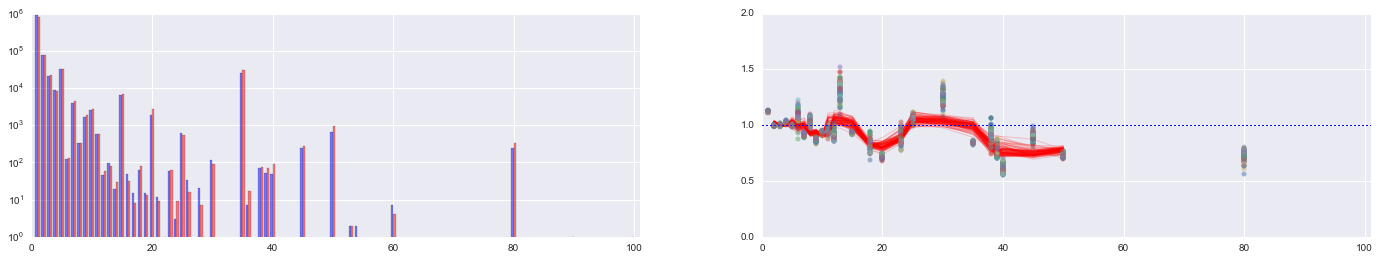

A:8190 / Начальное / 83683 11372


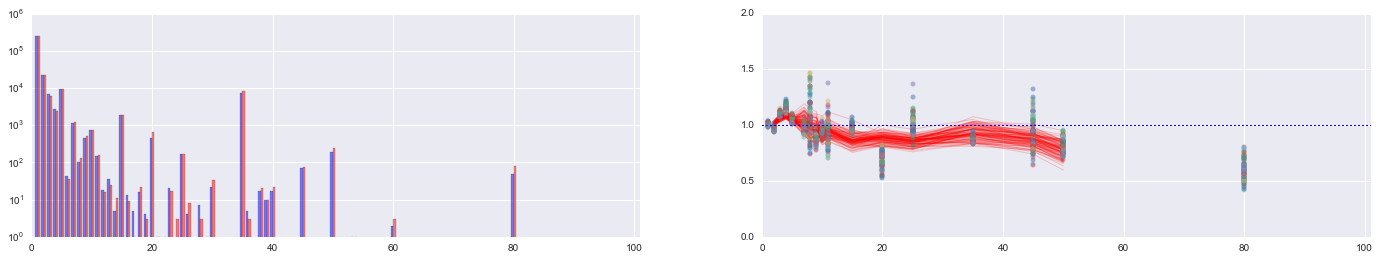

A:8203 / Среднее / 83200 11855


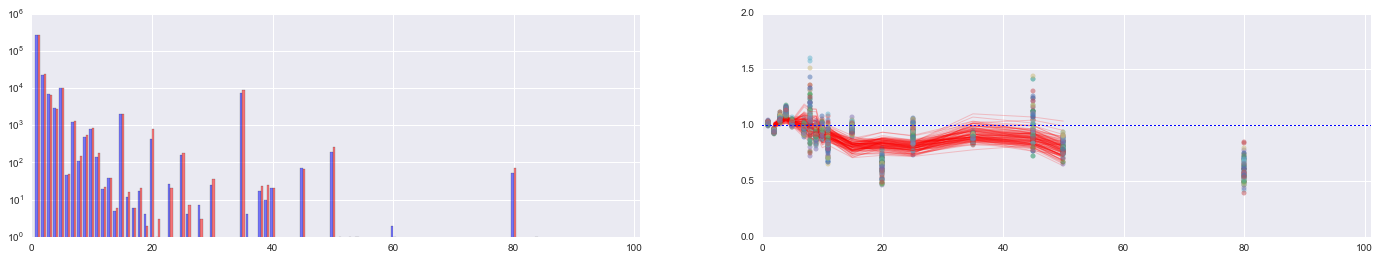

A:8483 / Поиск работы / 76446 18609


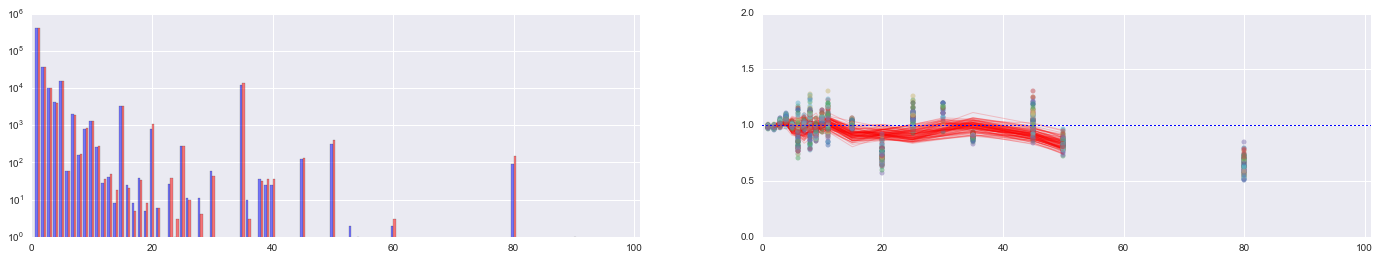

A:8484 / Одежда, обувь и аксессуары / 55012 40043


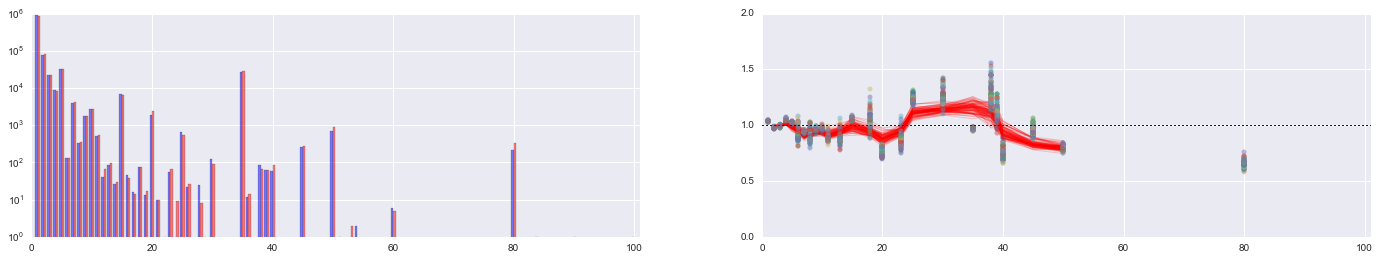

A:8487 / Мобильная связь и доступ в интернет / 80840 14215


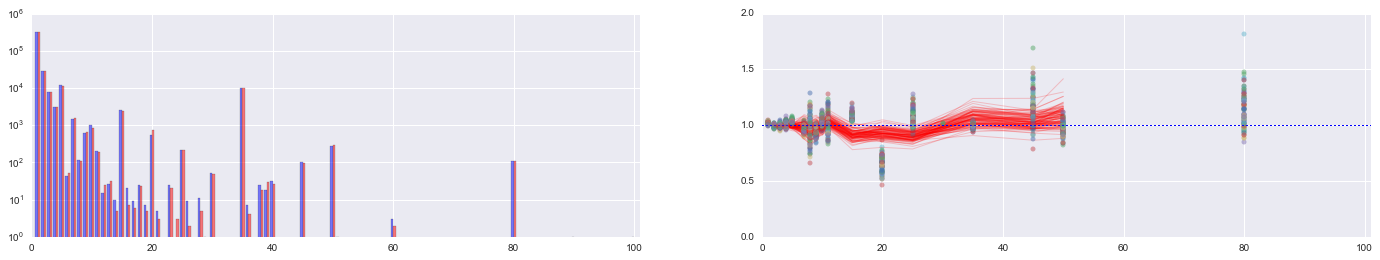

A:8488 / Кулинария / 67217 27838


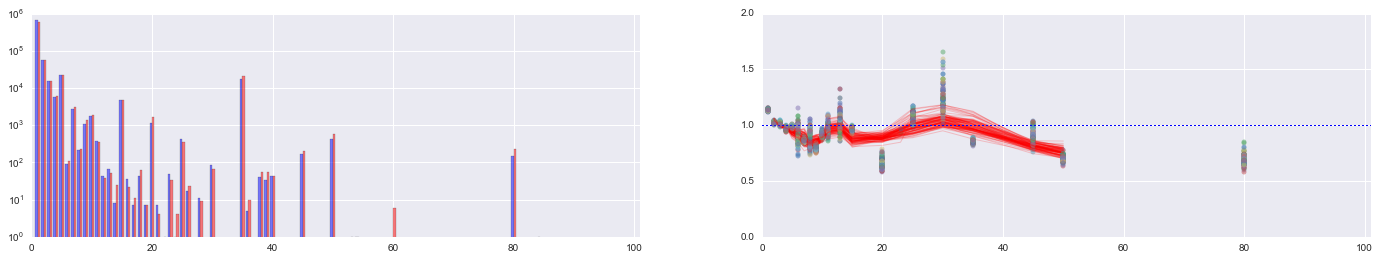

A:8489 / Сериалы / 77273 17782


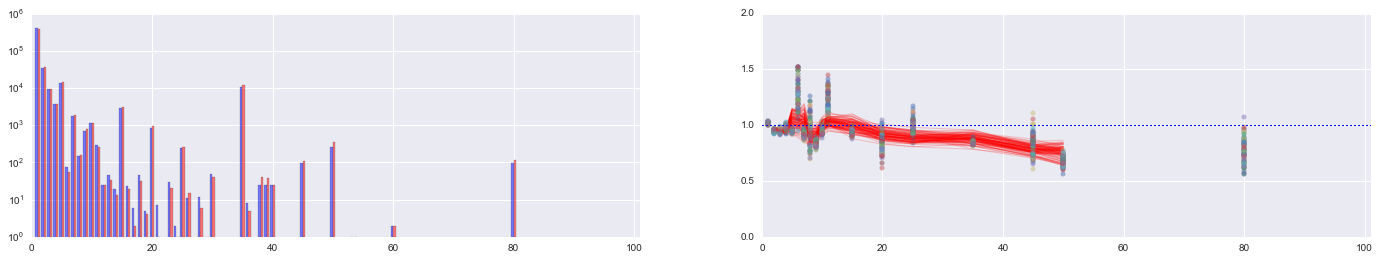

A:8493 / Финансы и бухгалтерский учет / 60452 34603


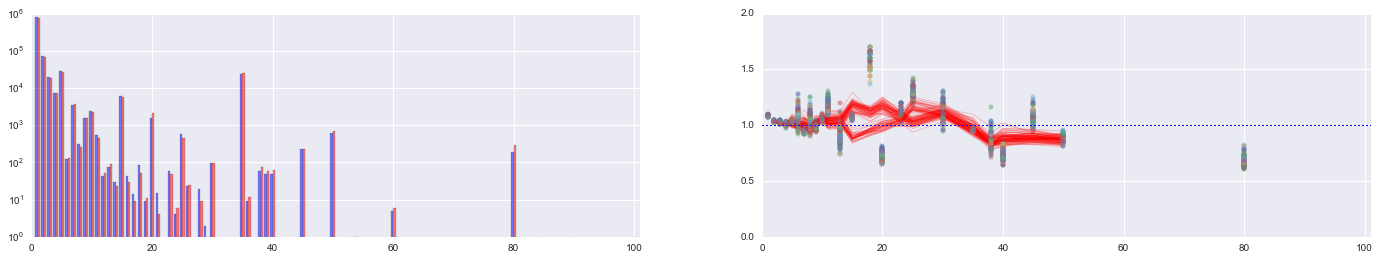

A:8494 / B2B / 80438 14617


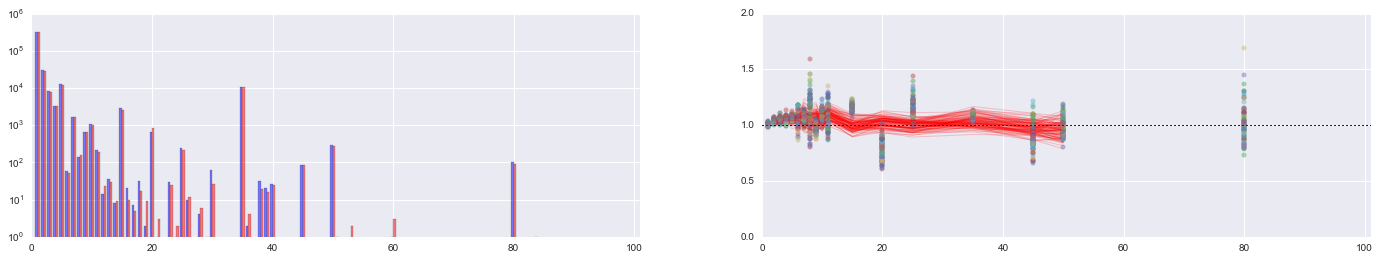

A:8496 / Юридическая поддержка / 67096 27959


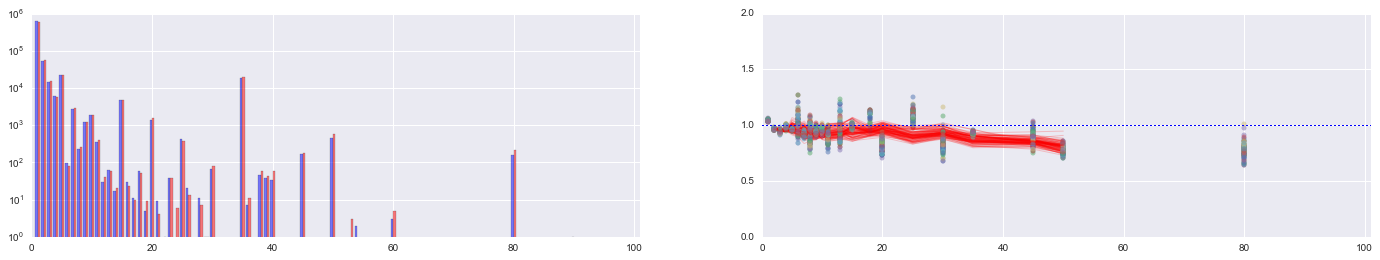

A:8498 / Путешественники зарубежные / 82806 12249


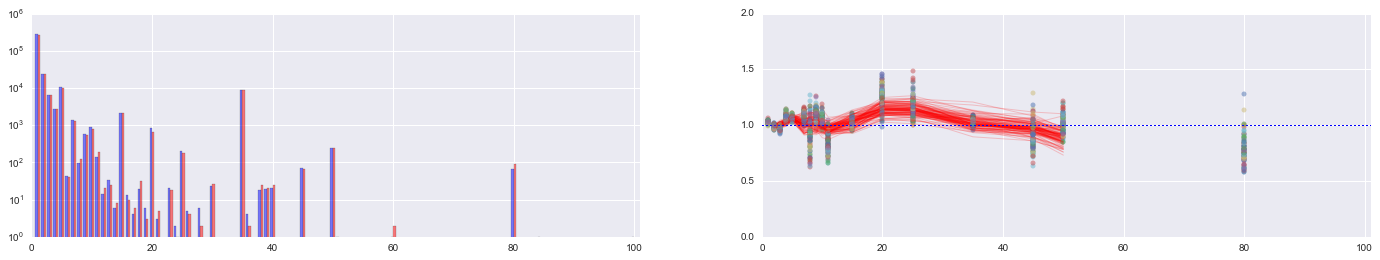

A:8552 / Беременность и роды / 66600 28455


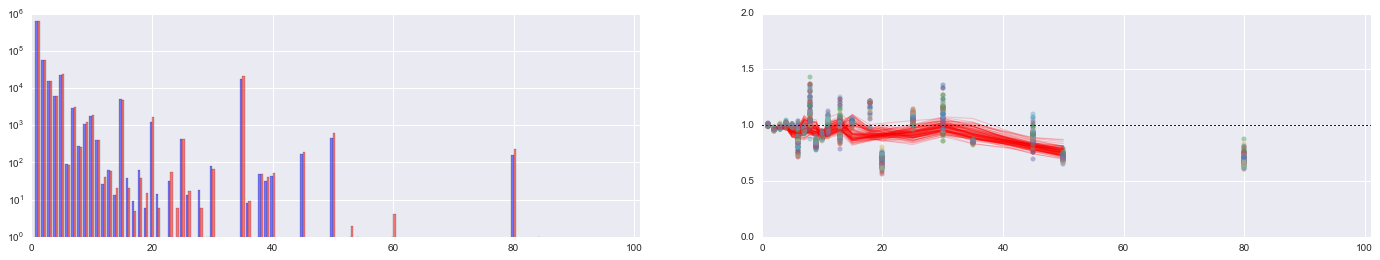

A:8668 / Образование / 78857 16198


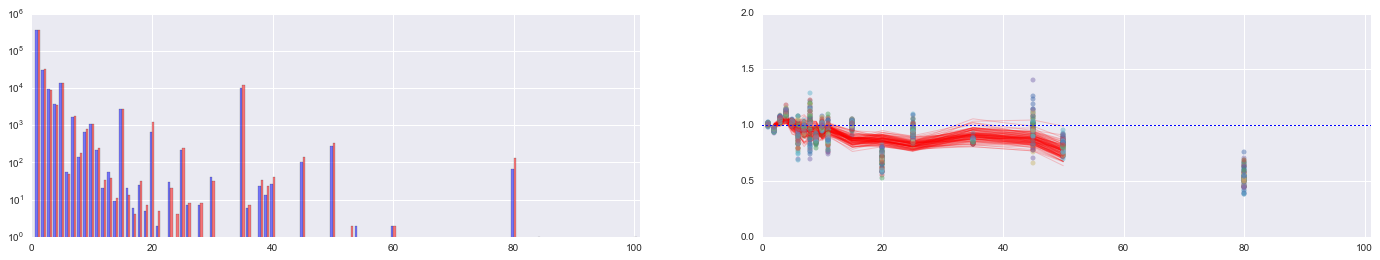

A:8669 / Изучение языков / 77527 17528


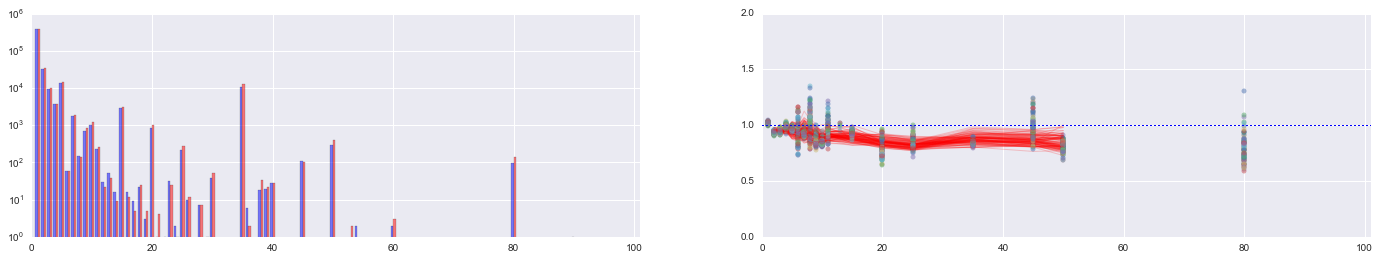

A:8878 / Красота и уход за собой / 73594 21461


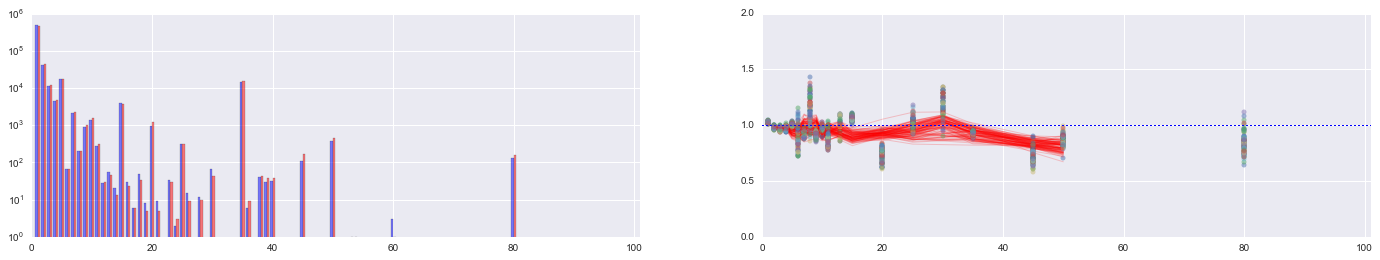

A:8879 / Развлечения / 53994 41061


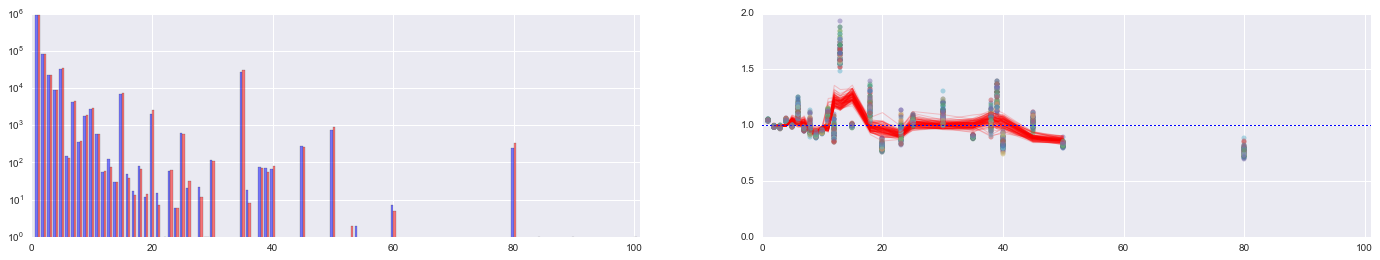

A:8962 / Малый бизнес / 81733 13322


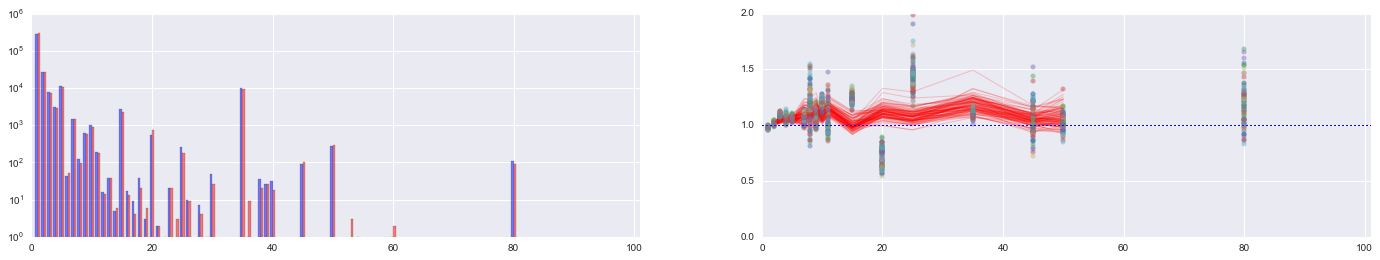

A:9073 / Бухгалтерия, управленческий учет, финансы предприятия / 68540 26515


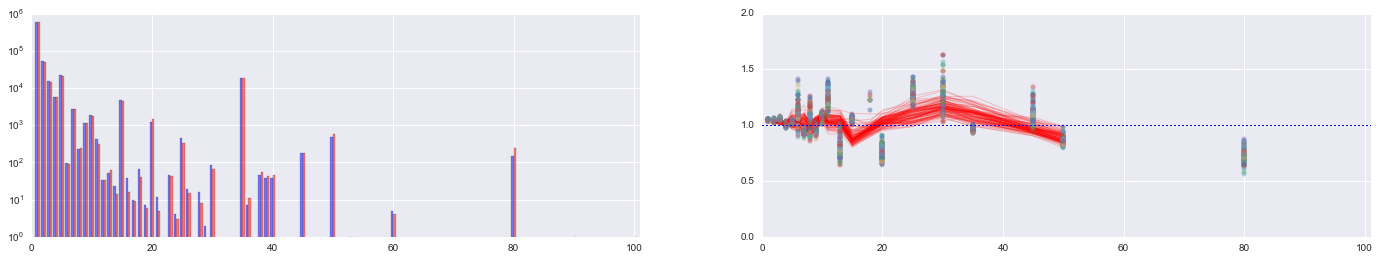

A:9075 / Административный персонал / 75356 19699


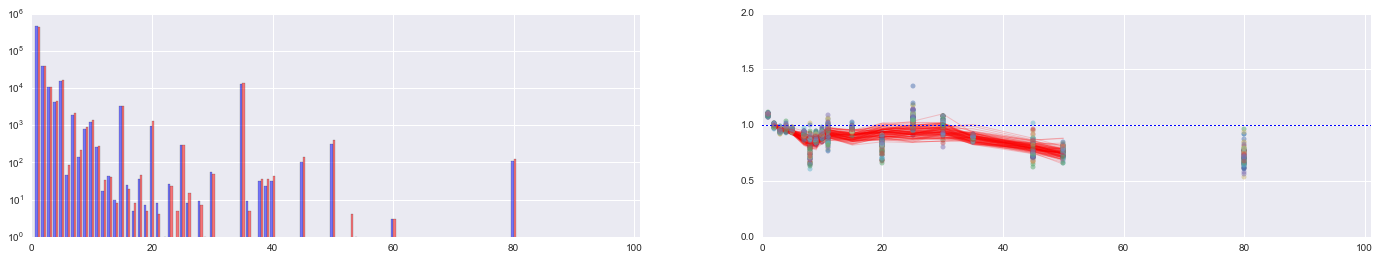

A:9076 / Банки, инвестиции, лизинг / 46357 48698


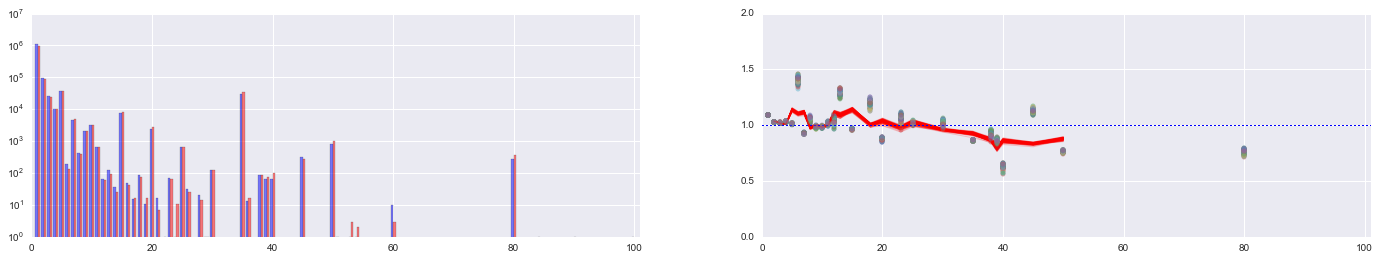

A:9079 / Безопасность / 83914 11141


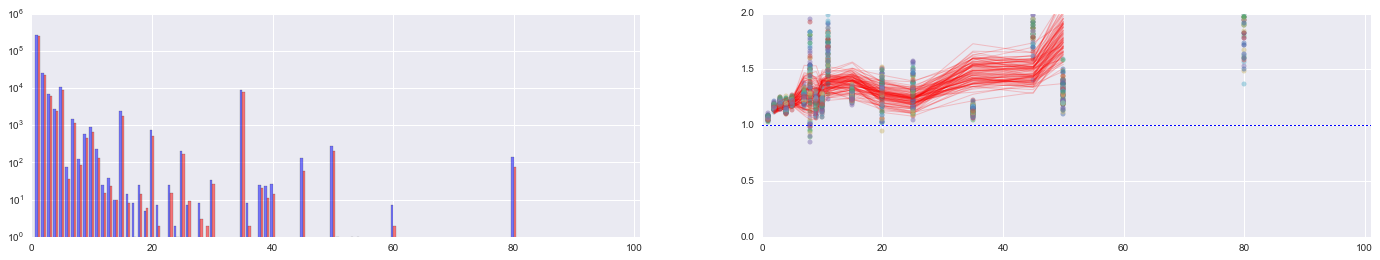

A:9082 / Искусство, развлечения, масс-медиа / 83306 11749


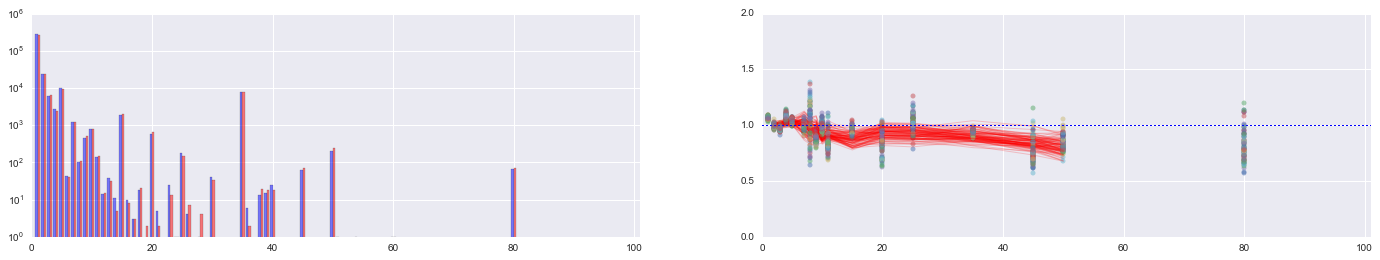

A:9084 / Медицина, фармацевтика / 76309 18746


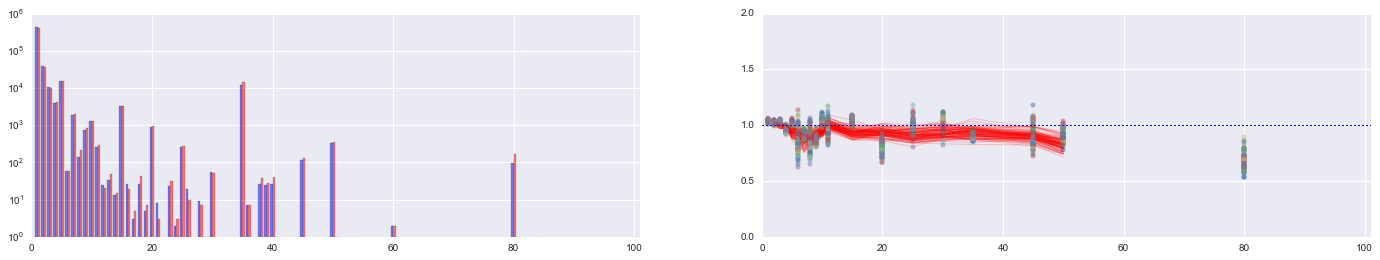

A:9085 / Наука, образование / 78622 16433


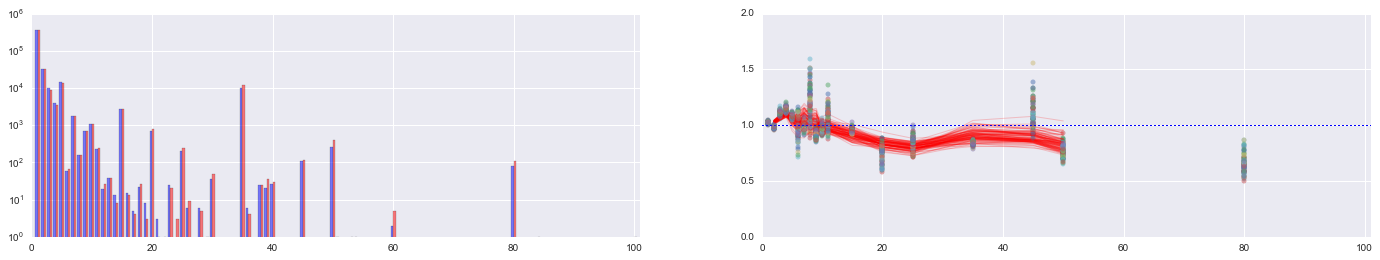

A:9086 / Государственная служба, некоммерческие организации / 82112 12943


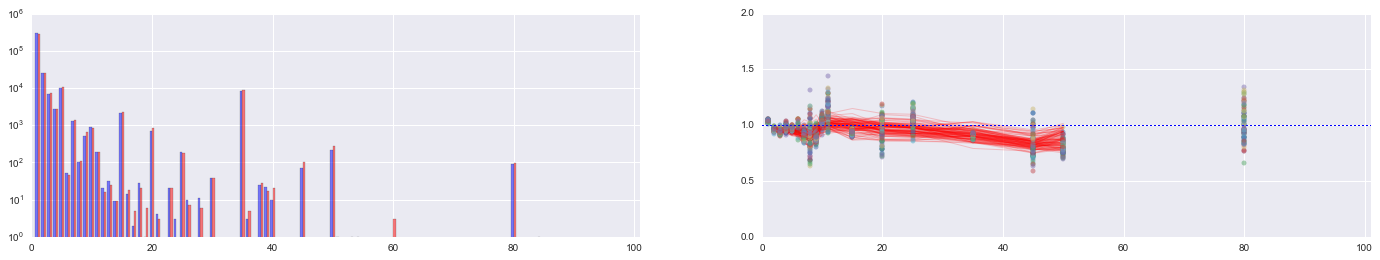

A:9087 / Продажи / 75023 20032


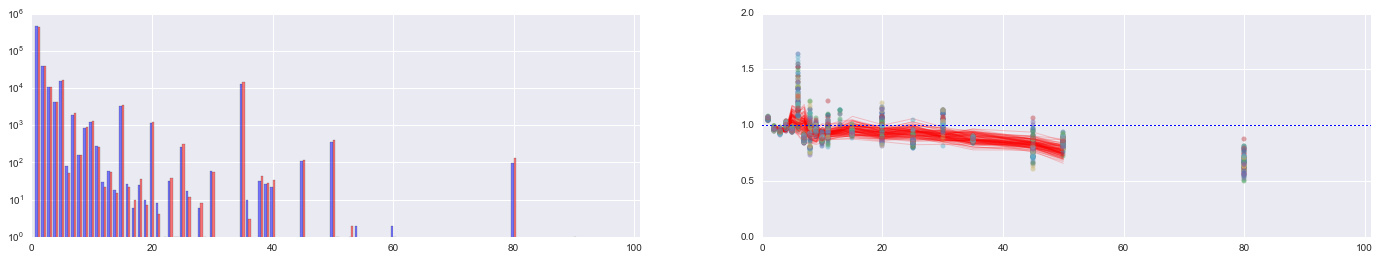

A:9091 / Транспорт, логистика / 84211 10844


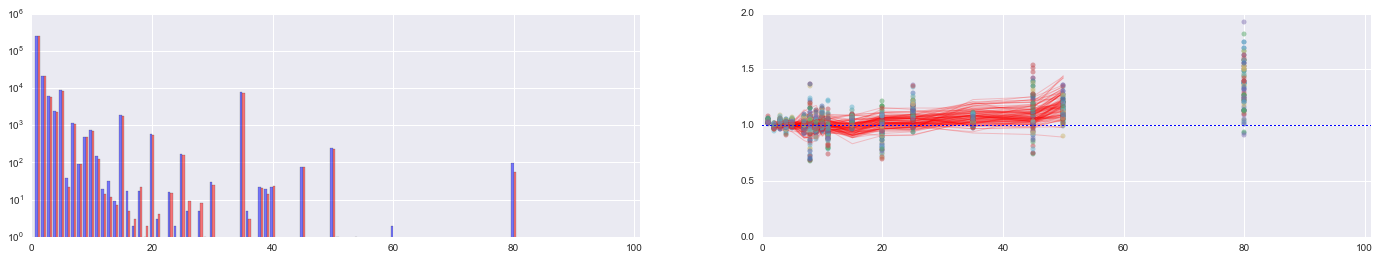

A:9092 / Туризм, гостиницы, рестораны / 83945 11110


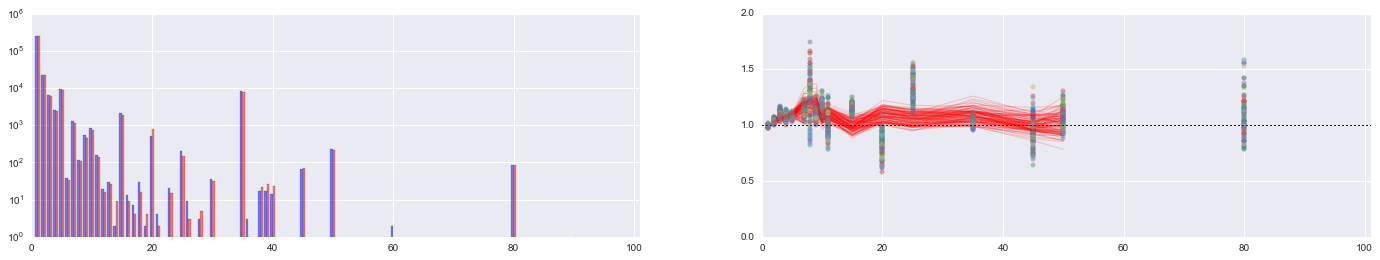

A:9093 / Юристы / 70233 24822


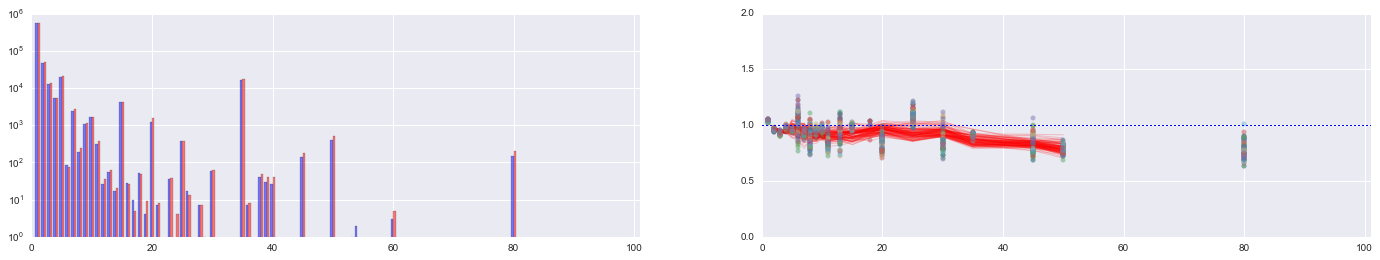

A:9094 / Спортивные клубы, фитнес, салоны красоты / 85045 10010


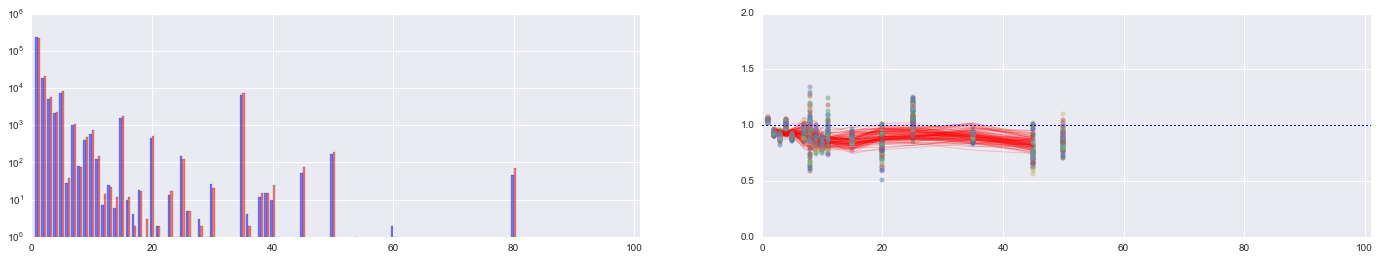

A:9097 / Домашний персонал / 61911 33144


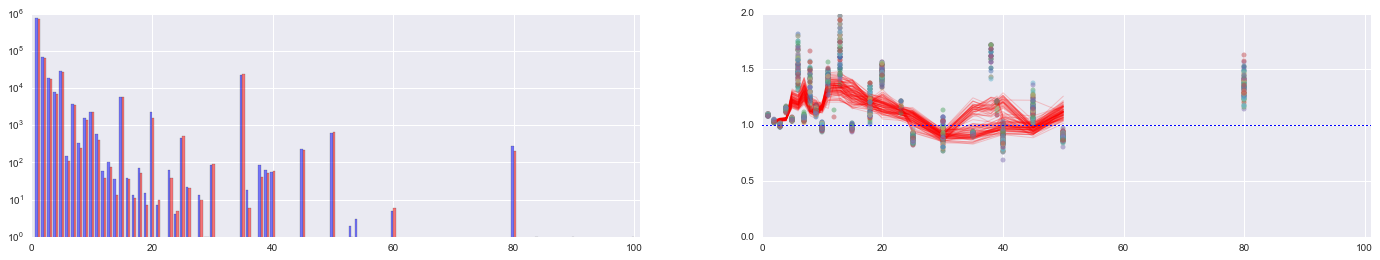

A:9098 / Рабочий персонал / 75850 19205


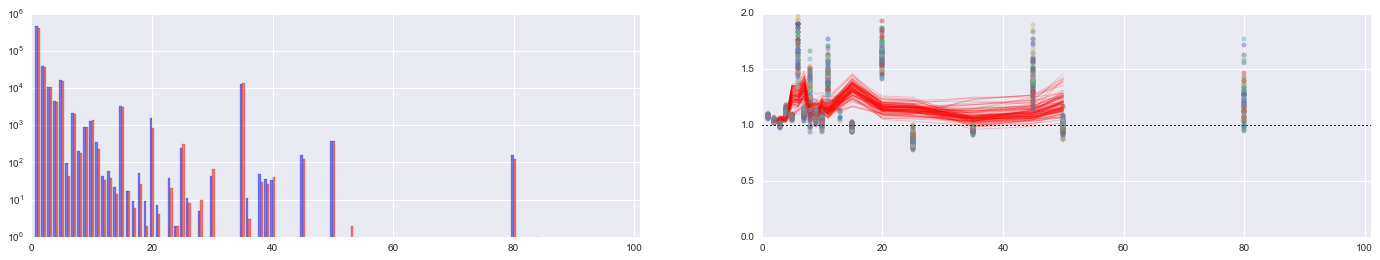

A:9158 / Медицина общая / 80922 14133


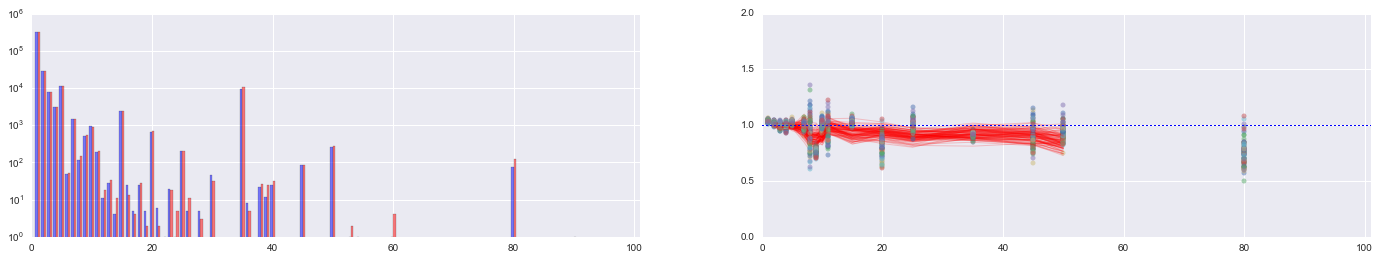

A:9286 / A - Ниже среднего / 71744 23311


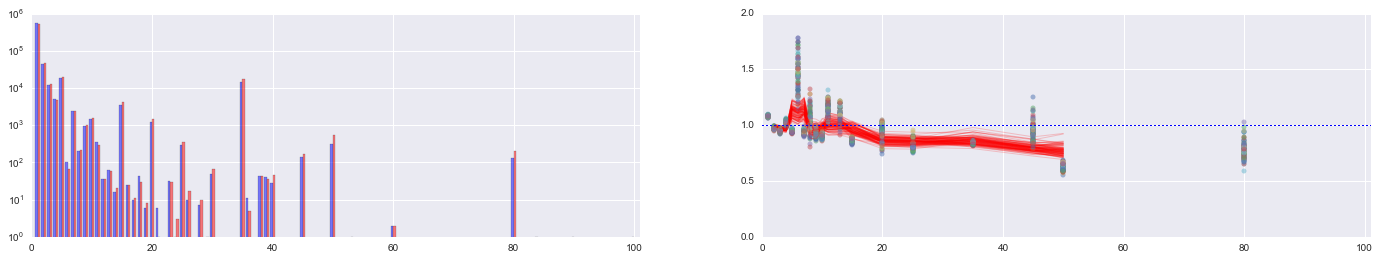

A:9287 / B - Средний / 25931 69124


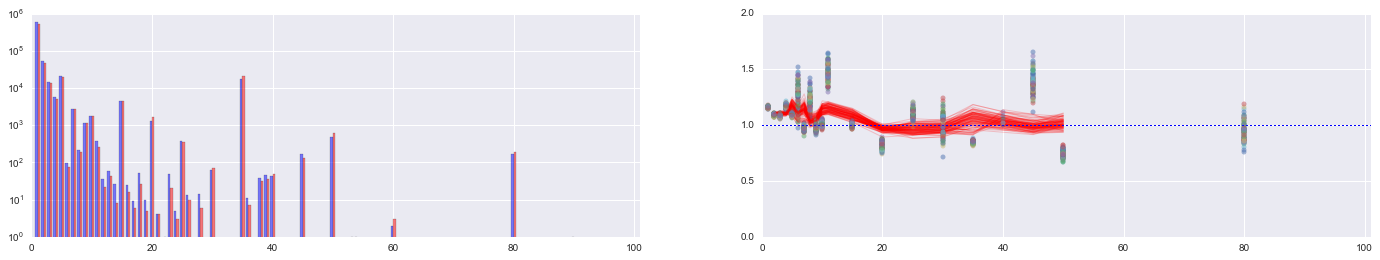

A:9288 / C - Выше среднего / 53674 41381


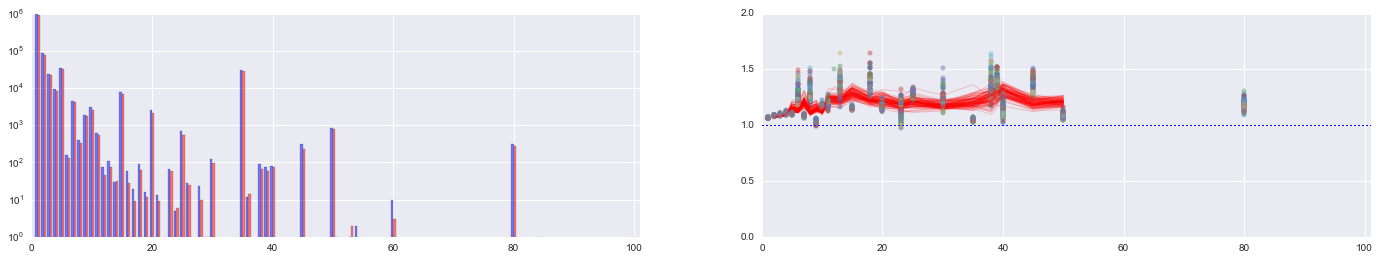

A:9304 / Подарки / 73489 21566


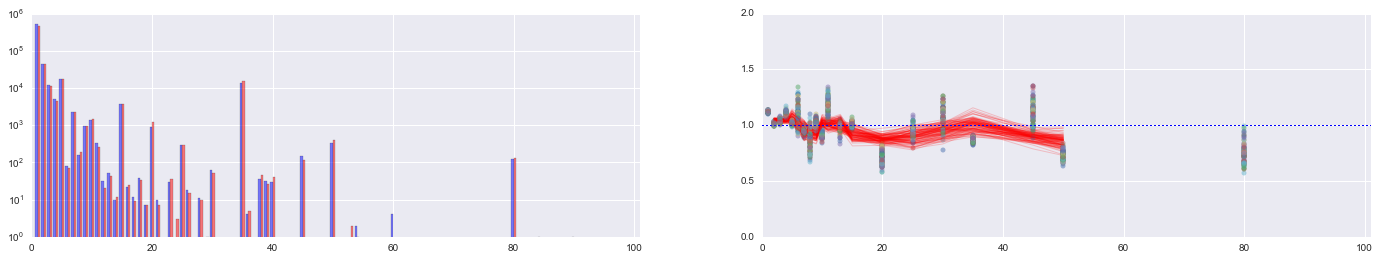

A:9351 / Родители новорожденных / 67753 27302


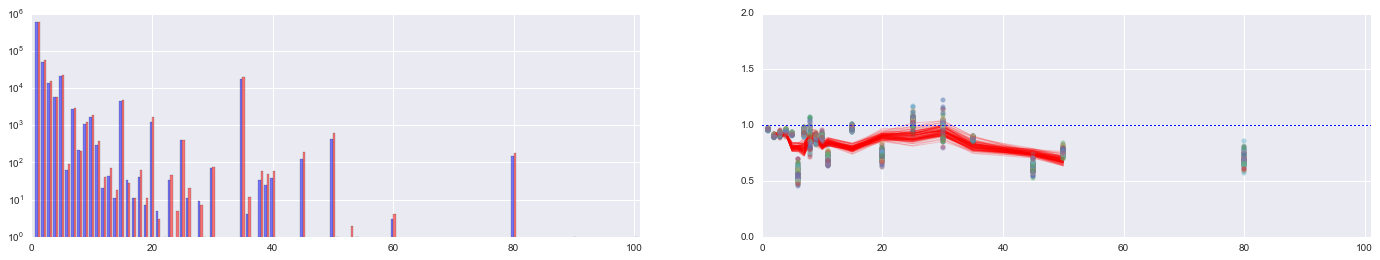

A:9352 / Родители малышей / 63318 31737


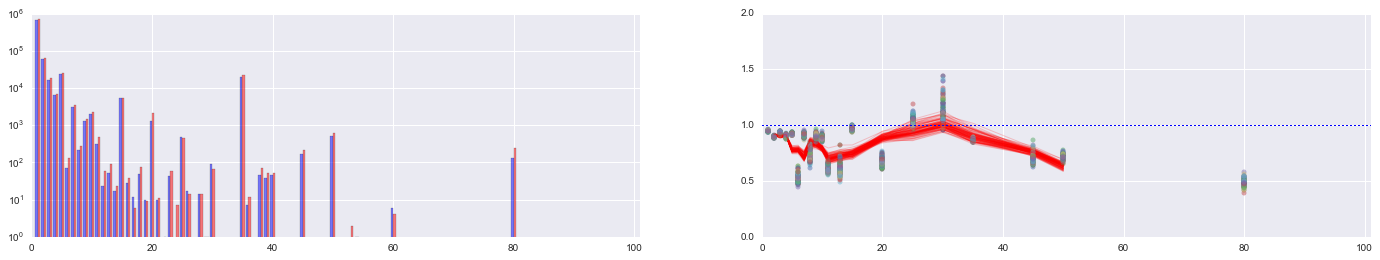

A:9353 / Родители дошкольников / 69575 25480


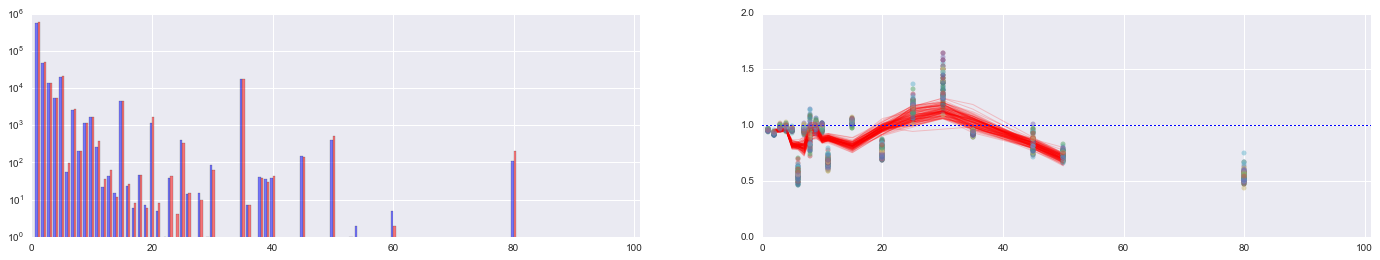

A:9354 / Родители школьников начальных классов / 61727 33328


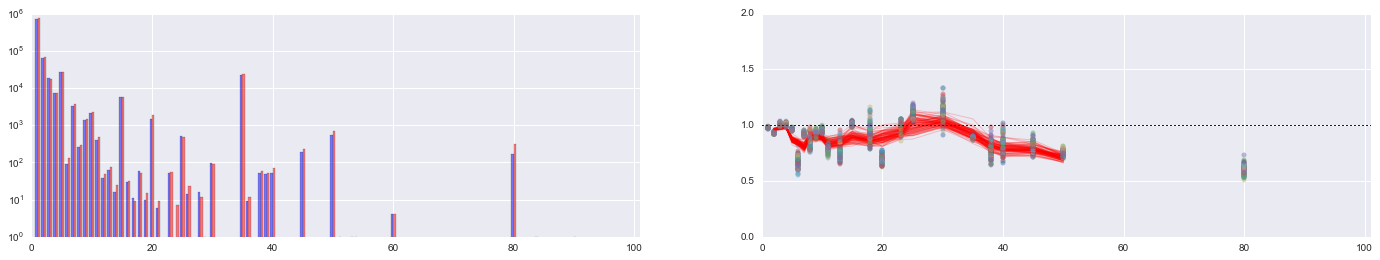

A:9380 / Родители школьников средних и старших классов / 62809 32246


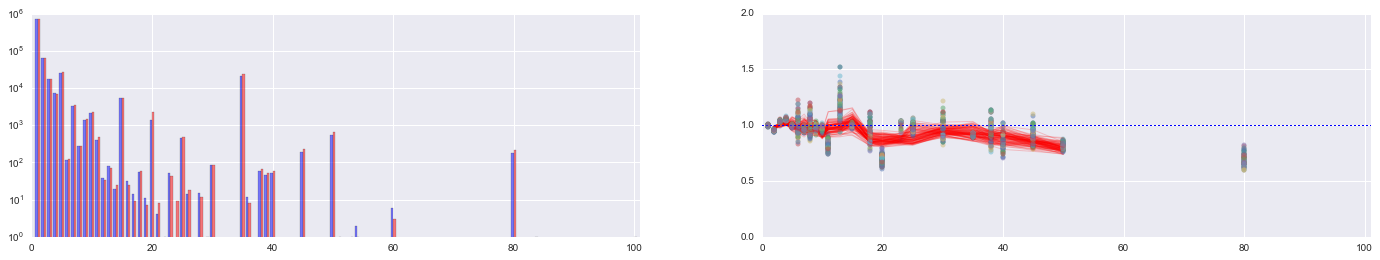

A:9452 / Туризм Россия+СНГ / 80664 14391


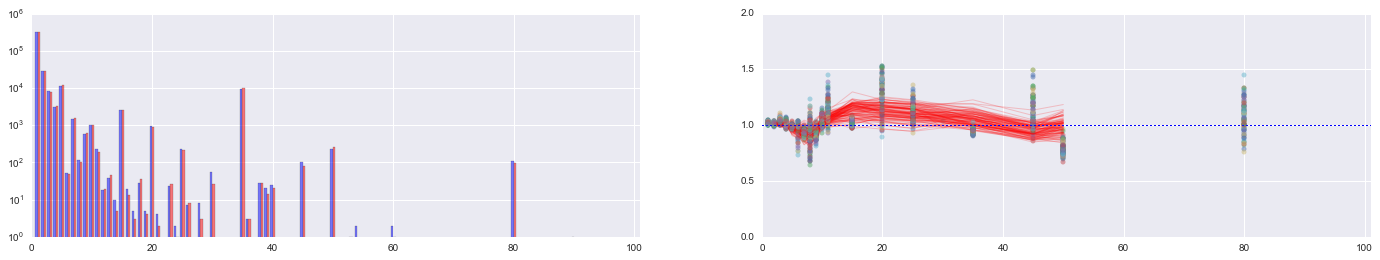

age:0 / age:0 / 92867 2188


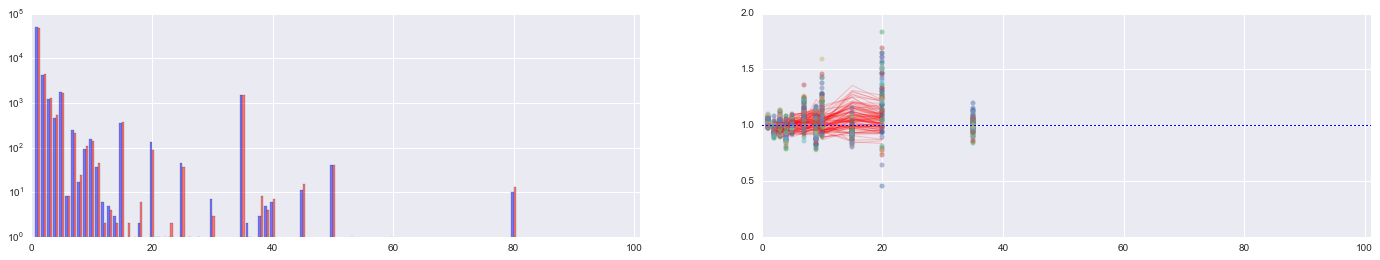

age:10 / age:10 / 82633 12422


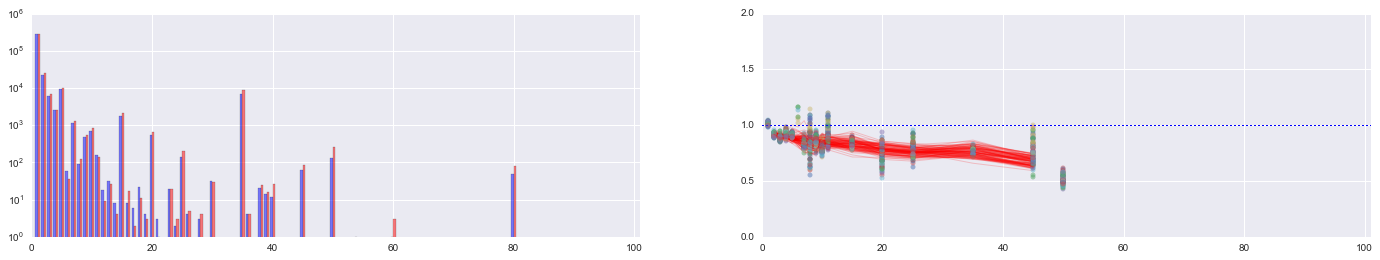

age:100 / age:100 / 94517 538


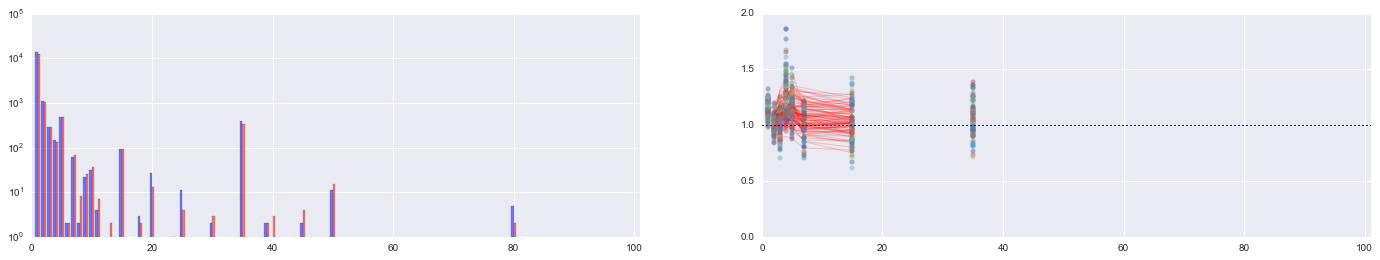

age:110 / age:110 / 94495 560


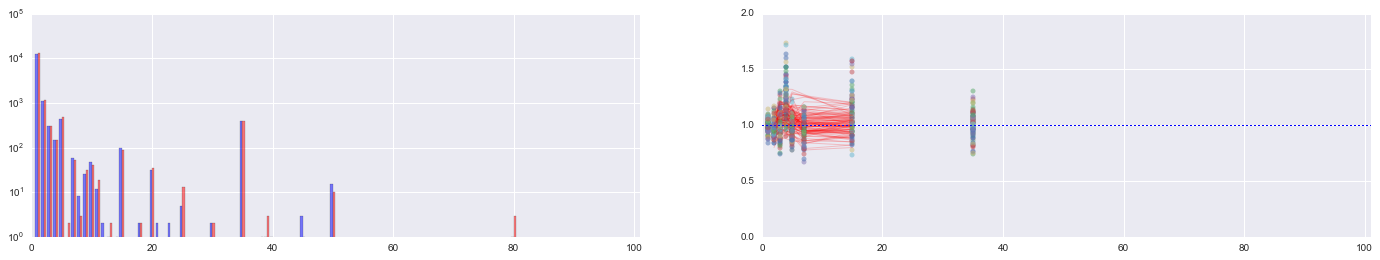

age:20 / age:20 / 73825 21230


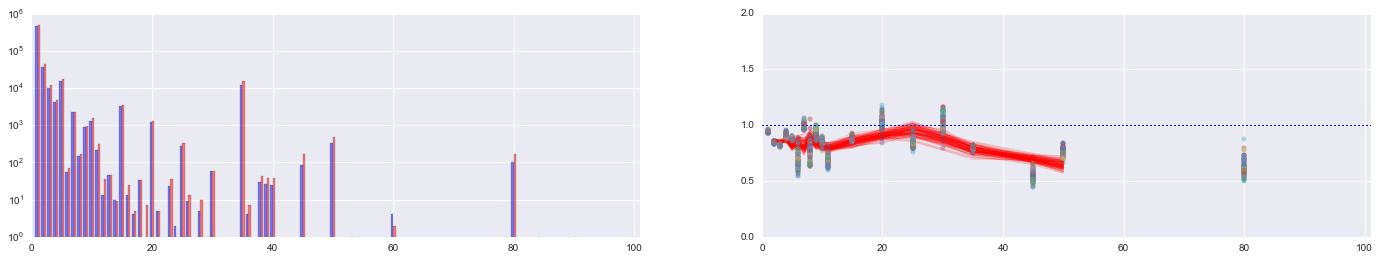

age:30 / age:30 / 64120 30935


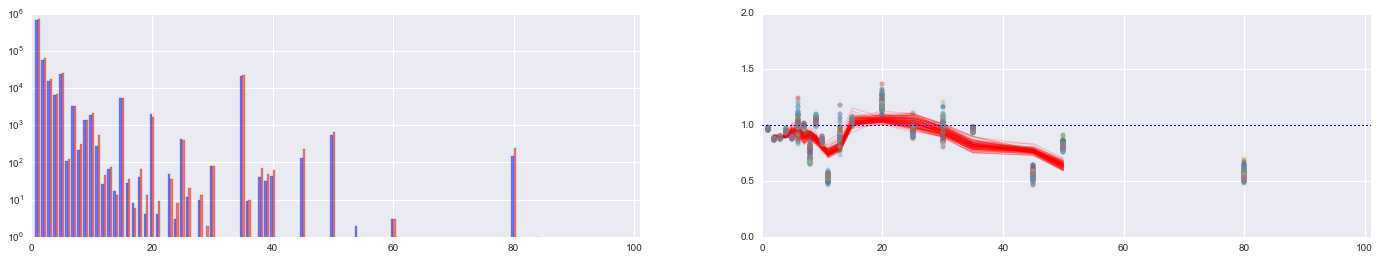

age:40 / age:40 / 73078 21977


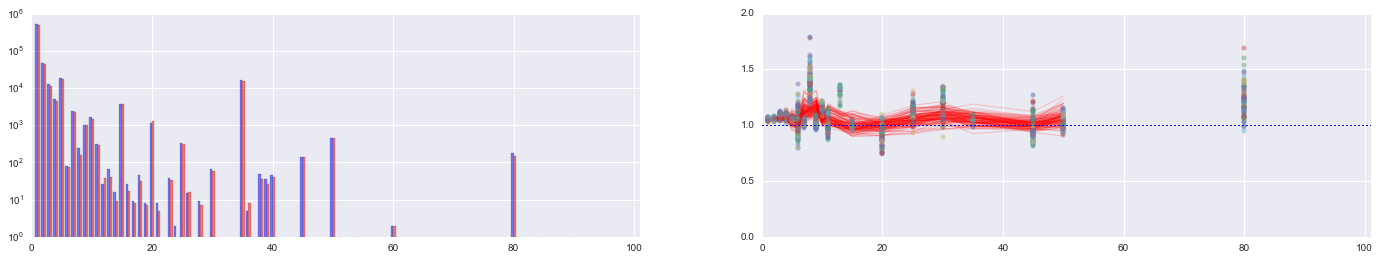

age:50 / age:50 / 75956 19099


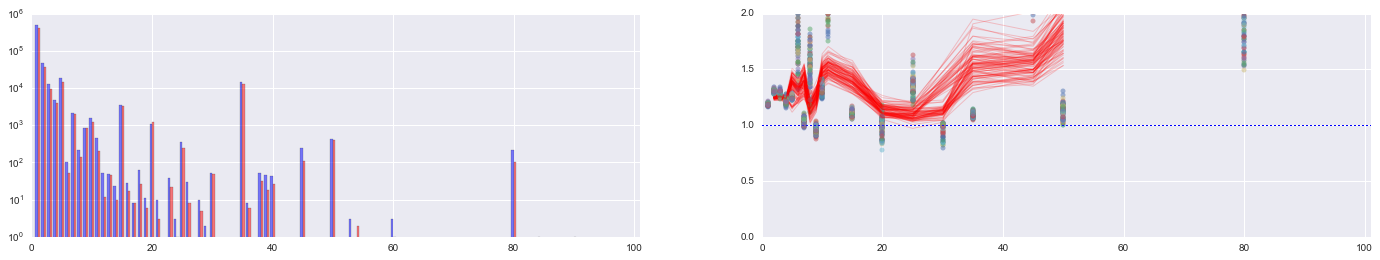

age:60 / age:60 / 87691 7364


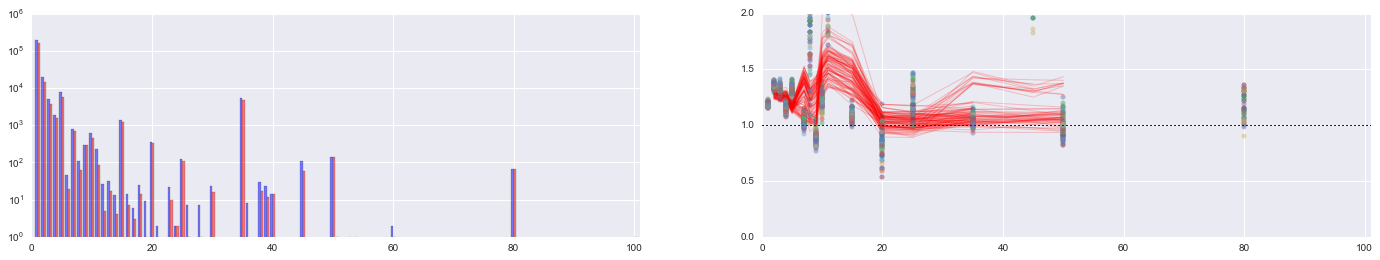

age:70 / age:70 / 94371 684


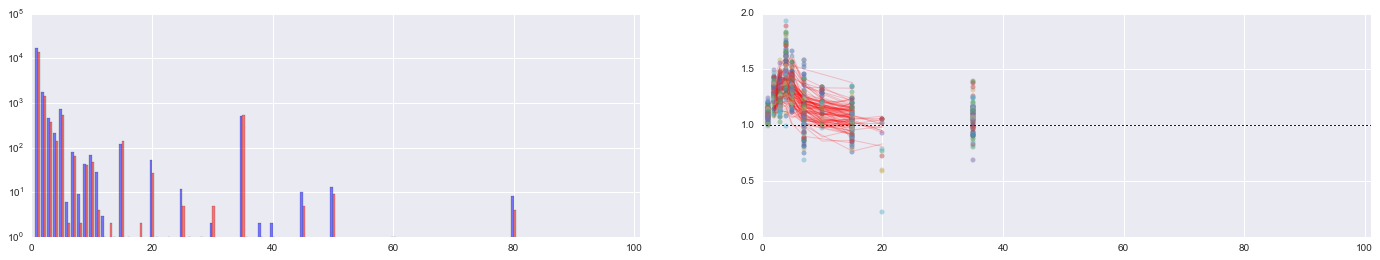

age:80 / age:80 / 94340 715


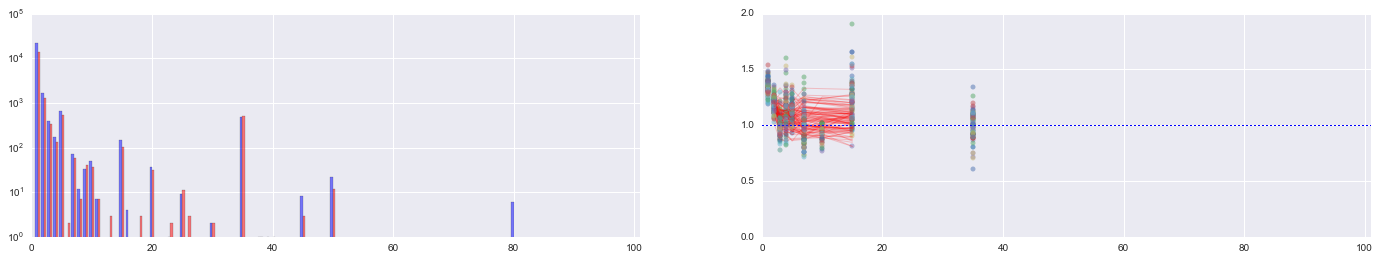

age:90 / age:90 / 93234 1821


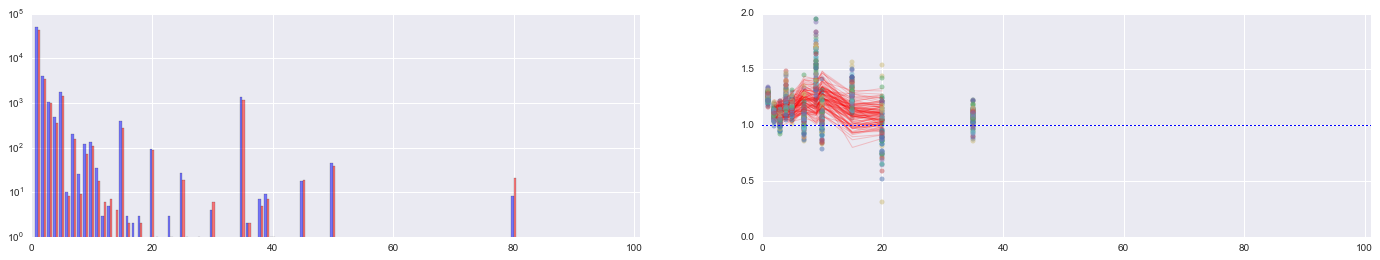

edu:1 / edu:1 / 34290 60765


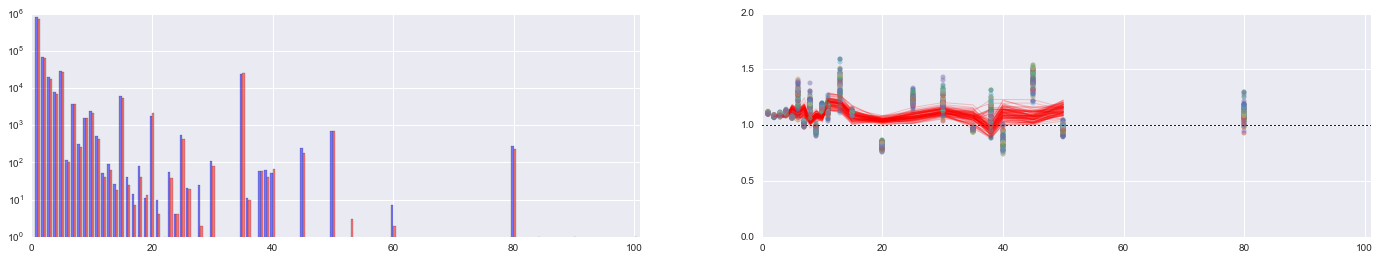

edu:2 / edu:2 / 46658 48397


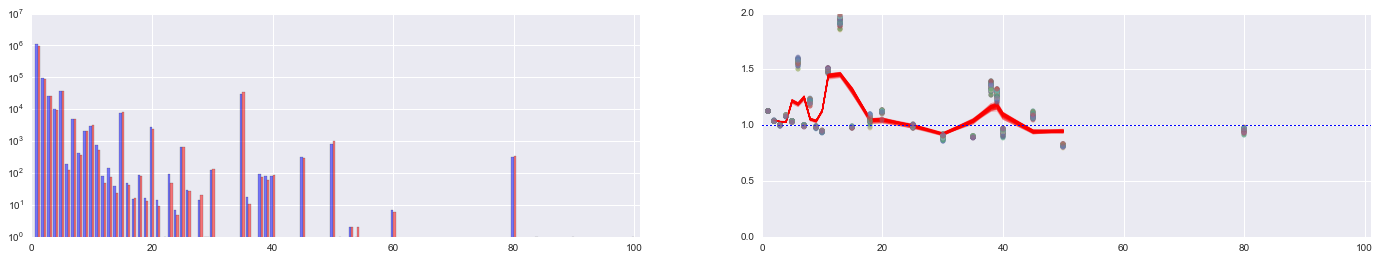

emp:1 / emp:1 / 25891 69164


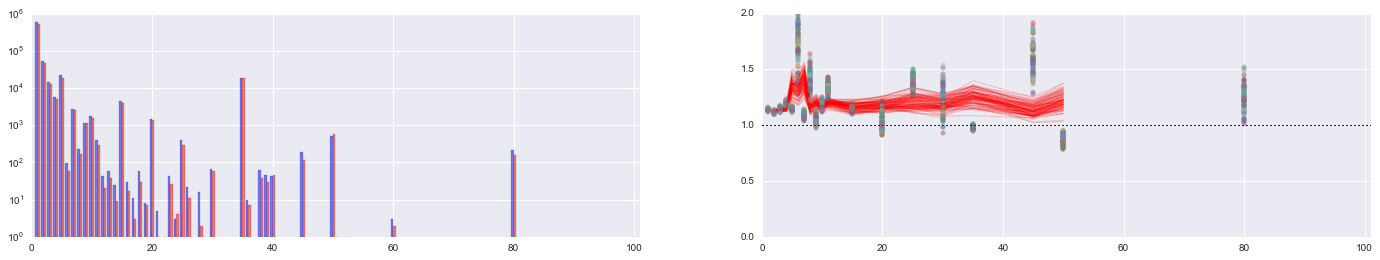

emp:2 / emp:2 / 56632 38423


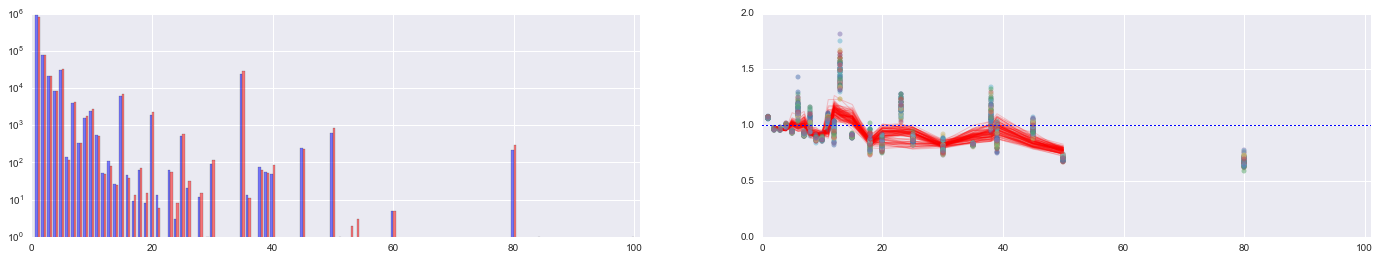

fam:1 / fam:1 / 32466 62589


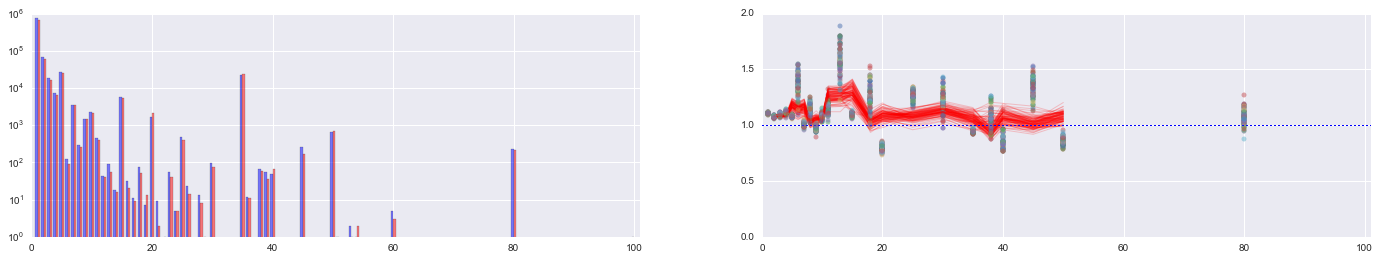

fam:2 / fam:2 / 45809 49246


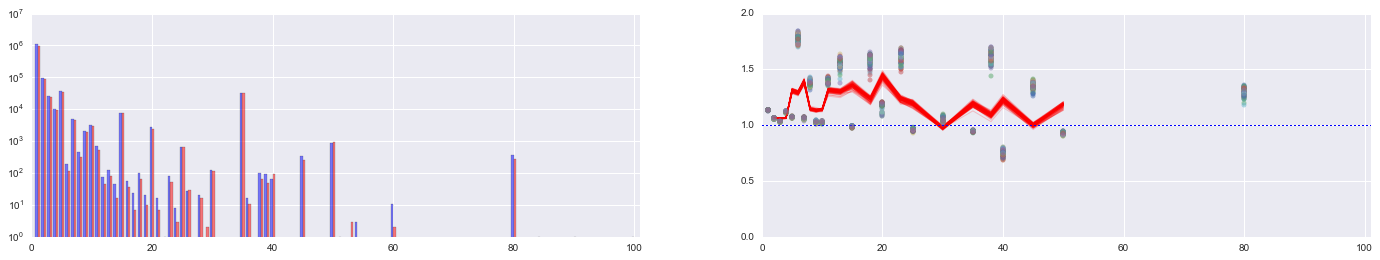

inc:1 / inc:1 / 70649 24406


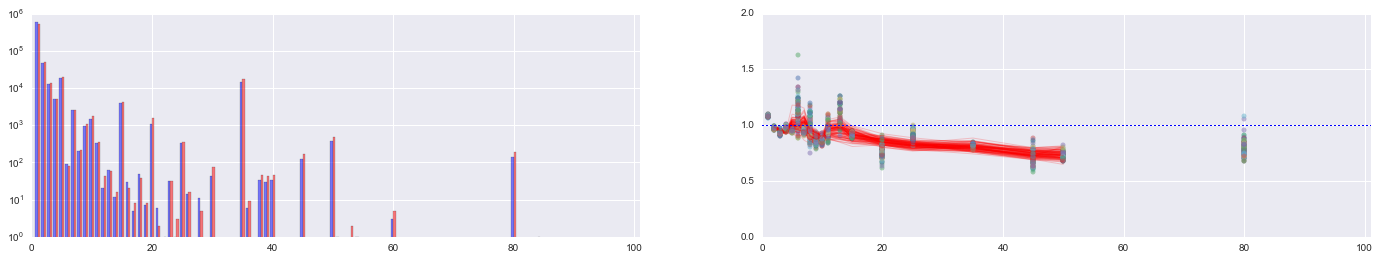

inc:2 / inc:2 / 37744 57311


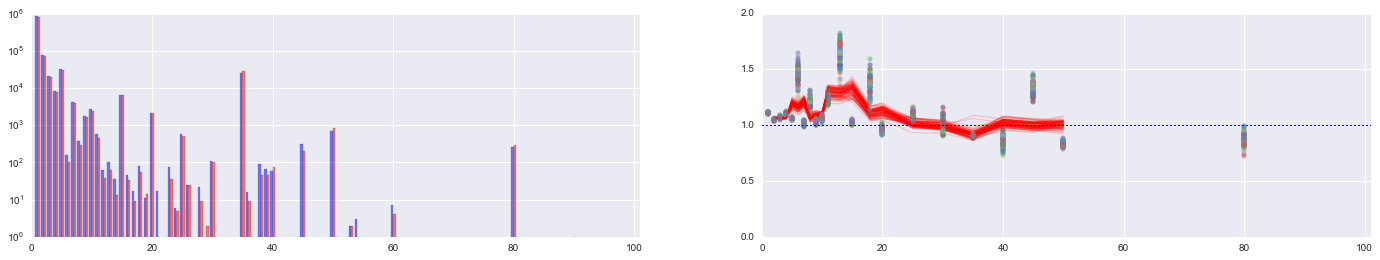

inc:3 / inc:3 / 68013 27042


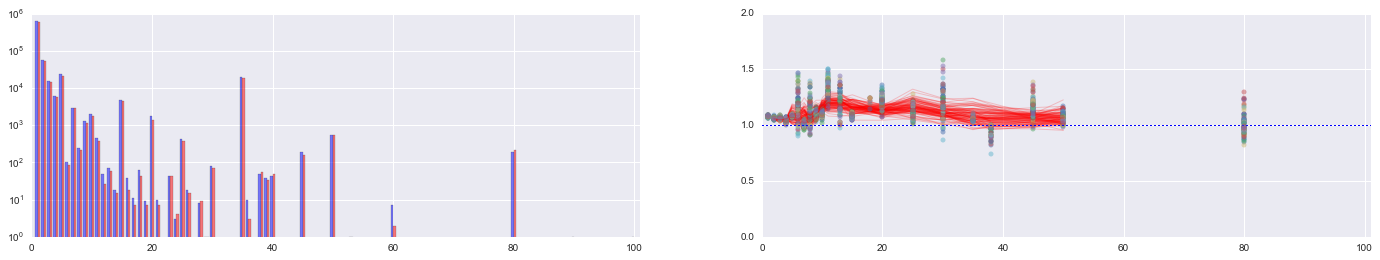

inc:4 / inc:4 / 77070 17985


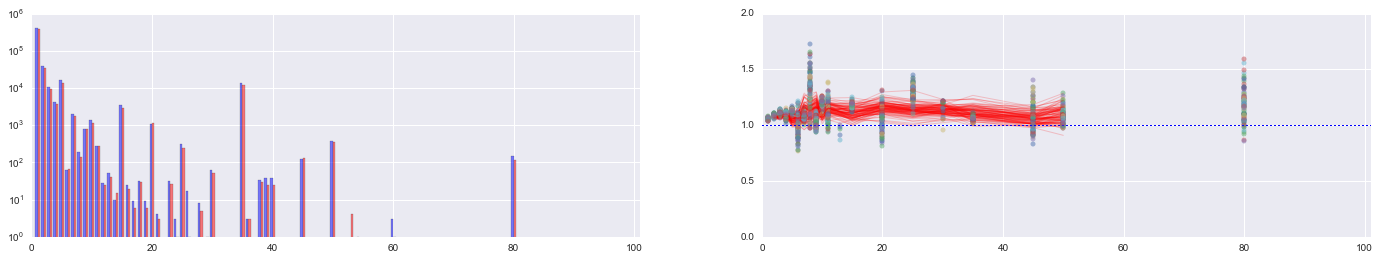

inc:5 / inc:5 / 89684 5371


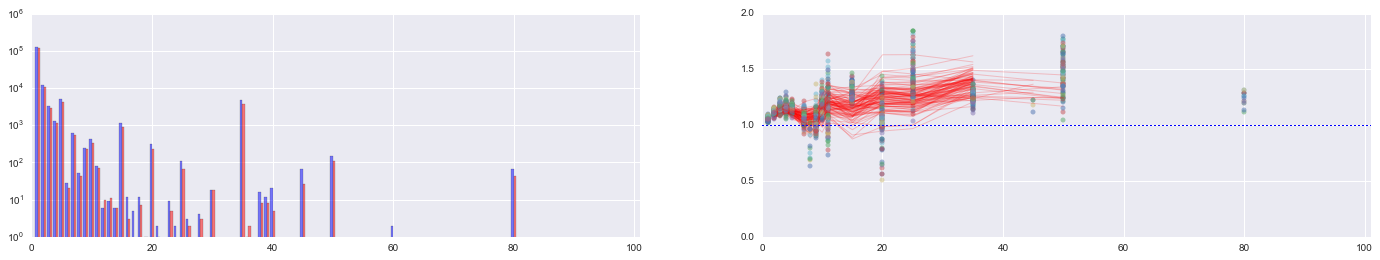

is_male:False / is_male:False / 20249 74806


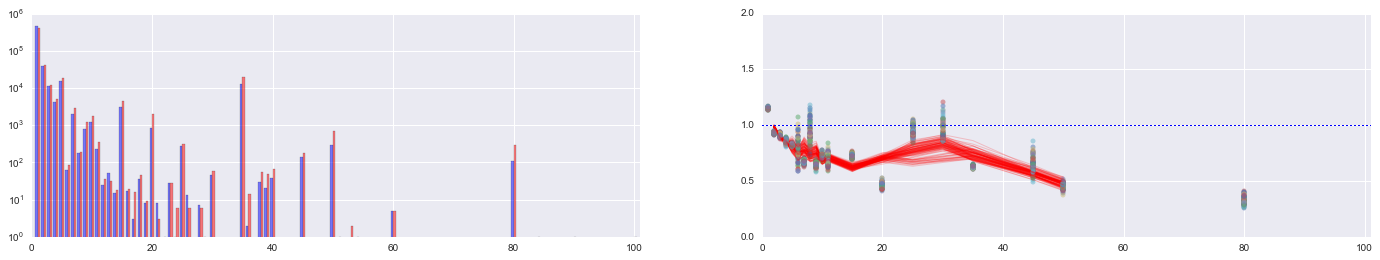

is_male:True / is_male:True / 63472 31583


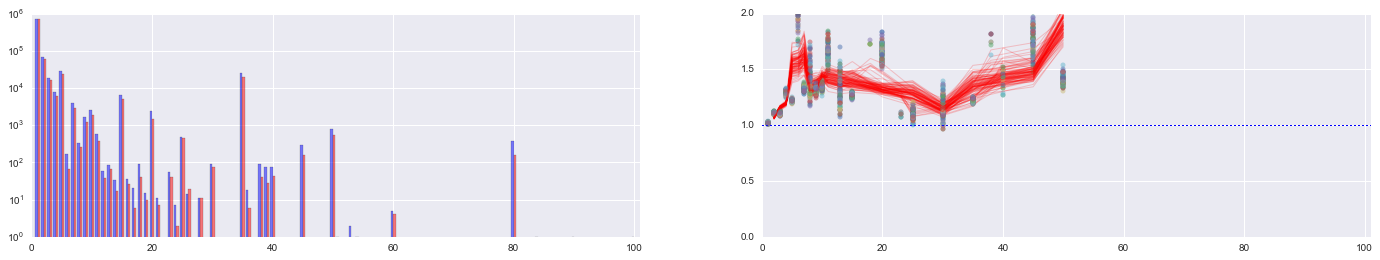

ltv:1 / ltv:1 / 68296 26759


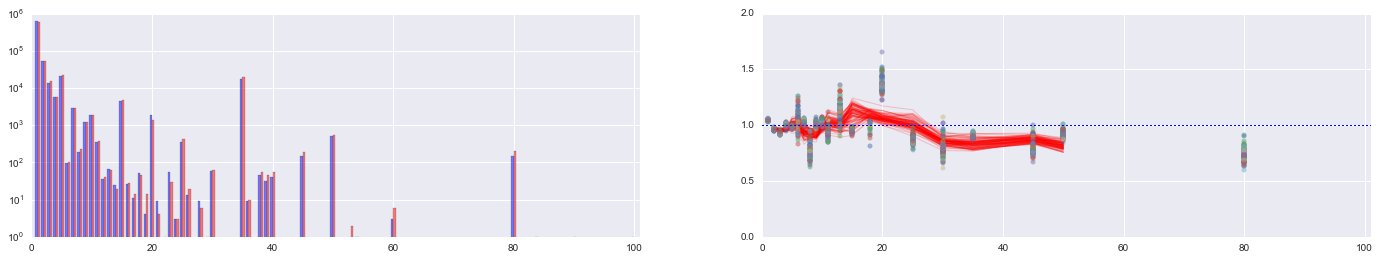

ltv:2 / ltv:2 / 43983 51072


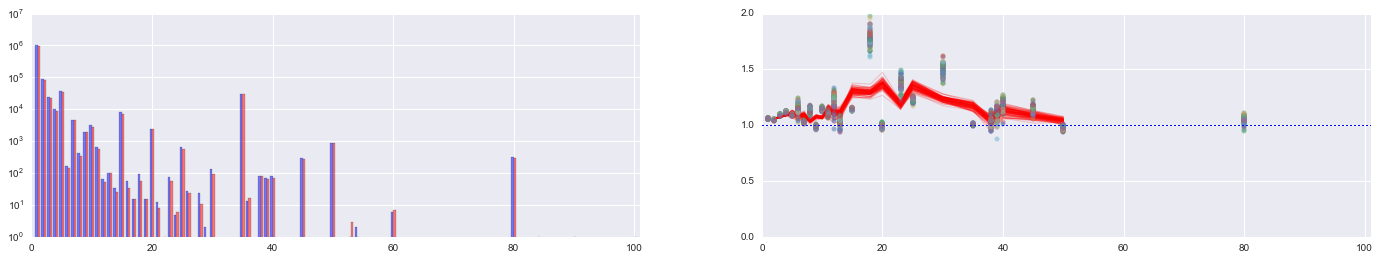

ltv:3 / ltv:3 / 48652 46403


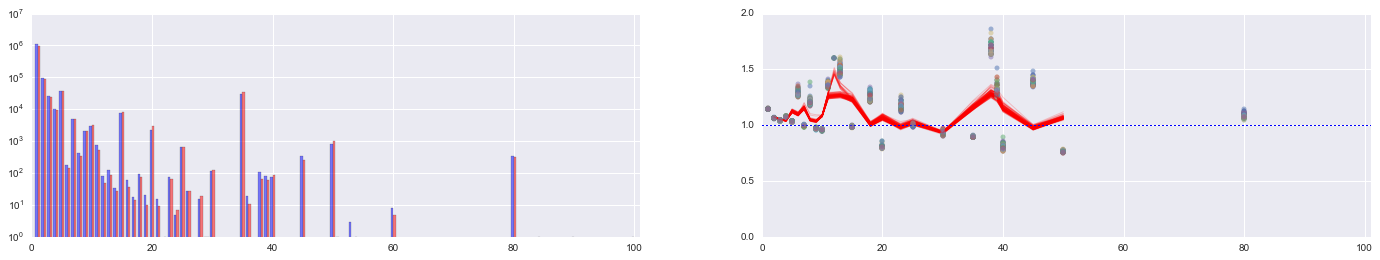

In [9]:
def plot_price(dfx, bar_width=0.4, pos=0):
    colors = ['b', 'r']
    pl.bar(np.arange(100) + 1 - (1 - pos) * bar_width, np.sum(dfx[range(1, 101)], axis=0), width=bar_width, alpha=0.5, color=colors[pos])
    
def plot_price_diff(df1, df2, min_presents=49):
    a = np.sum(df1[range(1, 101)], axis=0)
    b = np.sum(df2[range(1, 101)], axis=0)
    
    a1 = a[np.logical_and(a > min_presents, b > min_presents)]
    b1 = b[np.logical_and(a > min_presents, b > min_presents)]    
    
    z = a1/b1
    
    pl.plot(z.index, z.values, 'o', alpha=0.5, markersize=5)
    pl.plot(z.index[1:-1], 0.33 * (z.values[2:] + z.values[:-2] + z.values[1:-1]), 'r-', alpha=0.2, lw=1)
    
    pl.axhline(1, lw=1, ls=":")

THRESHOLD = MIN_HITS_PER_FEATURE

for t_id in df_targets.columns:
    n_neg, n_pos = np.sum(df[t_id] < THRESHOLD), np.sum(df[t_id] >= THRESHOLD)
    print t_id, "/", targets.get(t_id, t_id), "/", n_neg, n_pos
    
    pl.figure(figsize=(24, 4))
    
    pos = df[df[t_id] >= THRESHOLD].sample(min(n_neg, n_pos))
    neg = df[df[t_id] < THRESHOLD].sample(min(n_neg, n_pos))
    
    pl.subplot(1, 2, 1)
    plot_price(pos, pos=0)
    plot_price(neg, pos=1)
    pl.xlim(0, 101)
    pl.gca().set_yscale('log')
    
    pl.subplot(1, 2, 2) 
    for k in xrange(100):
        plot_price_diff(df[df[t_id] >= THRESHOLD].sample(min(n_neg, n_pos)), df[df[t_id] < THRESHOLD].sample(min(n_neg, n_pos)))    
    pl.ylim(0, 2)
    pl.xlim(0, 101)
            
    pl.show()

## Сколько денег приносят подарки?

In [10]:
money = df[range(1, 101)].sum(axis=0) * np.arange(1, 101)
top_present_fractions = money[money/money.sum() > 0.05] / money.sum()
top_present_fractions

1     0.338831
2     0.060388
5     0.061614
35    0.372977
dtype: float64

In [11]:
top_presents = top_present_fractions.index.tolist()
top_presents

[1, 2, 5, 35]

Формируем признаки

In [12]:
new_columns = top_presents + [col for col in df_targets.columns.tolist() if col not in ["age:70", "age:80", "age:90", "age:100", "age:110", "age:0", "A:7370", "A:8496", "A:8190", "A:8487", "A:10261", "A:9077"]]

def make_matrix(df, top_presents, new_columns):
    X = np.zeros((df.shape[0], len(new_columns)), dtype=int)
    for j, column in enumerate(new_columns):
        if column in top_presents:
            X[:, j] = df[column]
        else:
            X[:, j] = (df[column] > MIN_HITS_PER_FEATURE).astype(int)
    return X

X = make_matrix(df, top_presents, new_columns)

Фильтруем неактивных пользователей

In [13]:
MIN_PRESENTS = 5
MAX_PRESENTS = 200
MIN_FEATURES = (len(new_columns) - len(top_presents)) / 10

a = np.sum(X[:, :len(top_presents)], axis=1) >= MIN_PRESENTS
b = np.sum(X[:, :len(top_presents)], axis=1) <= MAX_PRESENTS
c = np.sum(X[:, len(top_presents):], axis=1) >= MIN_FEATURES

X = X[np.logical_and(np.logical_and(a, b), c)]
users = df.index[np.logical_and(np.logical_and(a, b), c)].tolist()

len(users)

69494

## Фичи

In [14]:
target_sims = {}
for i, col1 in enumerate(new_columns):
    for j, col2 in enumerate(new_columns):
        if col1 not in top_presents and col2 not in top_presents and col1 < col2:            
            target_sims[(col1, col2)] = 1.0 * np.sum(X[:, i] != X[:, j]) / X.shape[0]
            
tss = pd.Series(target_sims)
for col1, col2 in tss.sort_values(ascending=True).index:
    # print col1, "-", col2, ">>", targets.get(col1, col1), "-" ,targets.get(col2, col2), "=" ,tss[(col1, col2)]
    pass

## Кластеризация

### Naive Bayes Clustering

In [15]:
class EMClustering(object):
    
    def __init__(self, n_classes, n_presents, n_restarts=1, nu=1, lam=1, mu=1, max_iter=1000, conv=1e-5, sample=0.75):
        self.n_classes = n_classes 
        self.n_presents = n_presents
        self.n_restarts = n_restarts
        self.n_interests = None
        
        self.nu = nu
        self.lam = lam
        self.mu = mu
        
        self.max_iter = max_iter
        self.conv = conv
        self.sample = sample
        
        self.K = None
        self.P = None
        self.I = None        
        
        self.LL = None
        self.aic = None
        self.bic = None
        
    def estimate_params(self, X_p, X_i, C):
        n_users = X_p.shape[0]
        
        K = np.zeros(self.n_classes, dtype=float)
        P = np.zeros((self.n_classes, self.n_presents))       
        I = np.zeros((self.n_classes, self.n_interests))
        
        for k in xrange(self.n_classes):
            K[k] = 1.0 * (self.nu + np.sum(C[:, k])) / (n_users + self.n_classes * self.nu)

            for m in xrange(self.n_presents):
                P[k, m] = 1.0 * (self.lam + np.sum(C[:, k] * X_p[:, m])) / (np.sum(C[:, k] * np.sum(X_p, axis=1)) + self.n_presents * self.lam)

            for i in xrange(self.n_interests):
                I[k, i] = 1.0 * (self.mu + np.sum(C[:, k] * X_i[:, i])) / (np.sum(C[:, k]) + self.mu * 2)
        
        return K, P, I
        
    def class_posterior(self, X_p, X_i, K, P, I):               
        C = np.zeros((X_p.shape[0], self.n_classes))
        new_LL = 0.0
        
        for n in xrange(C.shape[0]):
            ll = np.zeros(self.n_classes)
            for k in xrange(self.n_classes):
                ll[k] = np.log(K[k]) + np.sum(X_i[n] * np.log(I[k]) + (1 - X_i[n]) * np.log(1 - I[k])) + np.sum(X_p[n] * np.log(P[k]))
            C[n] = np.exp(ll) / np.exp(ll).sum()

            new_LL += np.log(np.exp(ll).sum())
            
        return C, new_LL

    def fit(self, X):
        self.n_interests = X.shape[1] - self.n_presents               

        for rest in xrange(self.n_restarts):
            print "Restart %d" % rest,
            
            sample_ind = np.random.choice(np.arange(X.shape[0]), size=self.sample * X.shape[0], replace=False)
            
            X_p = X[sample_ind][:, :self.n_presents]
            X_i = X[sample_ind][:, self.n_presents:]

            n_users = X_p.shape[0]
            
            # Class probabilities
            K = np.ones(self.n_classes, dtype=float) / self.n_classes
            # Price probabilities
            P = np.random.dirichlet(np.ones(self.n_presents), self.n_classes)
            # Interest probabilities
            I = np.random.random((self.n_classes, self.n_interests))
            # print K.shape, P.shape, I.shape

            # User class assignments
            C = np.random.dirichlet(np.ones(self.n_classes), n_users)
            # print C.shape

            cur_LL, cur_aic, cur_bic = None, None, None
            for iter in xrange(self.max_iter):
                # E
                K, P, I = self.estimate_params(X_p, X_i, C)
                # M
                C, new_LL = self.class_posterior(X_p, X_i, K, P, I)
                print ".",                

                if cur_LL is not None and 0 <= ((cur_LL - new_LL) / cur_LL) < self.conv:
                    cur_aic = 2 * (K.shape[0] + P.shape[0] * P.shape[1] + I.shape[0] * I.shape[1]) - 2 * new_LL
                    cur_bic = np.log(n_users) * (K.shape[0] + P.shape[0] * P.shape[1] + I.shape[0] * I.shape[1]) - 2 * new_LL
                    cur_LL = new_LL
                    print "Convergence on iter %d -> %f" % (iter, cur_LL)
                    break
                elif cur_LL is not None and new_LL < cur_LL:
                    raise ValueError("Likelihood decreasing! PANIC!")
                else:
                    cur_LL = new_LL

            if self.LL is None or self.LL < cur_LL:
                print "New best likelihood: %f" % cur_LL
                self.LL = cur_LL
                self.aic = cur_aic
                self.bic = cur_bic
                self.K, self.P, self.I = K, P, I

        return self
    
    def predict(self, X):
        X_p = X[:, :self.n_presents]
        X_i = X[:, self.n_presents:]
        
        C, ll = self.class_posterior(X_p, X_i, self.K, self.P, self.I)
        
        return C.argmax(axis=1), C

In [18]:
cl = EMClustering(5, len(top_presents), n_restarts=20)

n_train = 60000

u_train, u_test = users[:n_train], users[n_train:]
X_train, X_test = X[:n_train], X[n_train:]

cl.fit(X_train)

Restart 0 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Convergence on iter 41 -> -2826579.527755
New best likelihood: -2826579.527755
Restart 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Convergence on iter 54 -> -2827959.659449
Restart 2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Convergence on iter 29 -> -2831924.129311
Restart 3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Convergence on iter 59 -> -2828849.449947
Restart 4 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Convergence on iter 35 -> -2824549.587791
New best likelihood: -2824549.587791
Restart 5 . . . . . . . . . . . . . . . . . . . . . . Convergence on iter 21 -> -2828842.124914
Restart 6 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Convergence on ite

In [19]:
colors = [pl.get_cmap('Accent')(int(c * 255.0 / cl.n_classes)) for c in xrange(cl.n_classes)]

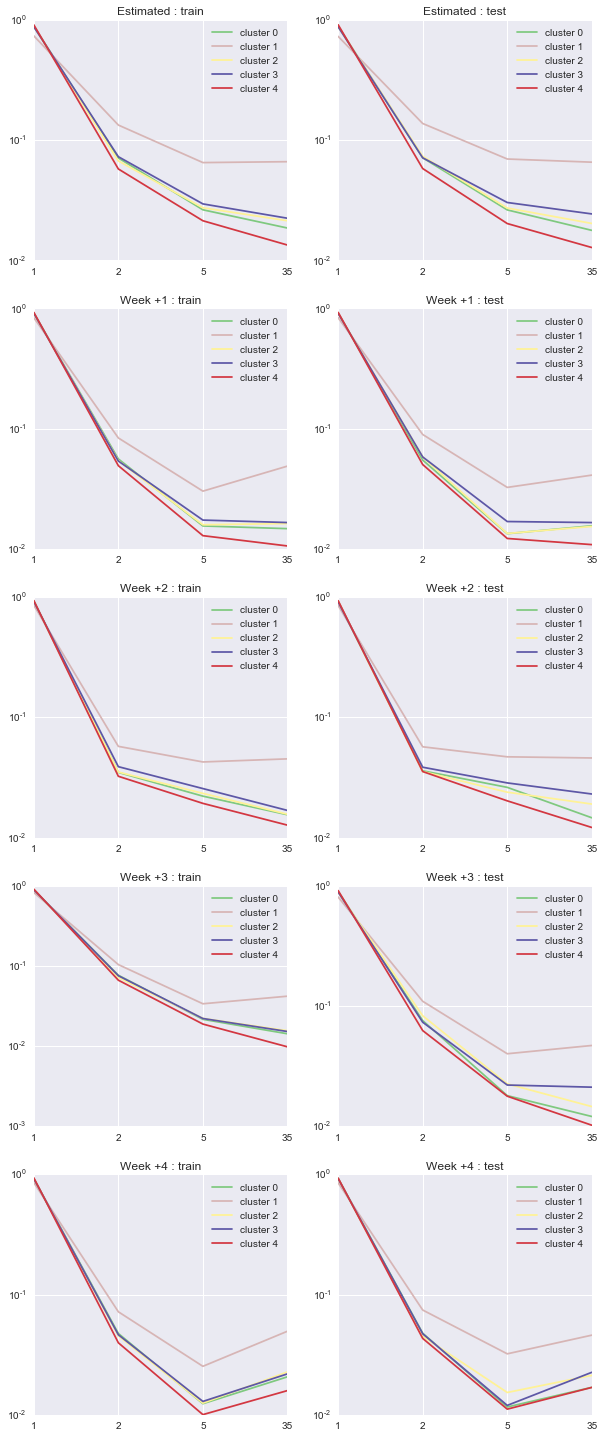

In [20]:
pl.figure(figsize=(10, 25))

Y1, C1 = cl.predict(X_train)
Y2, C2 = cl.predict(X_test)

pl.subplot(5, 2, 1)
for c in xrange(cl.n_classes):
    pl.plot(cl.P[c], label='cluster %d' % c, color=colors[c])
pl.gca().set_yscale('log')
pl.xticks(range(cl.n_presents), top_presents)
pl.title("Estimated : train")
pl.legend()

K2, P2, I2 = cl.estimate_params(X_test[:, :cl.n_presents], X_test[:, cl.n_presents:], C2)
pl.subplot(5, 2, 2)
for c in xrange(cl.n_classes):
    pl.plot(P2[c], label='cluster %d' % c, color=colors[c])    
pl.gca().set_yscale('log')
pl.xticks(range(cl.n_presents), top_presents)
pl.title("Estimated : test")
pl.legend()

dfs_test = [df_test_1, df_test_2, df_test_3, df_test_4]

for t in xrange(4):
    X1 = make_matrix(dfs_test[t].ix[u_train], top_presents, new_columns)
    K1, P1, I1 = cl.estimate_params(X1[:, :cl.n_presents], X1[:, cl.n_presents:], C1)
    
    pl.subplot(5, 2, 2 * (t + 1) + 1)
    for c in xrange(cl.n_classes):
        pl.plot(P1[c], label='cluster %d' % c, color=colors[c])    
    pl.gca().set_yscale('log')
    pl.xticks(range(cl.n_presents), top_presents)
    pl.title("Week +%d : train" % (t + 1))
    pl.legend()
    
    X2 = make_matrix(dfs_test[t].ix[u_test], top_presents, new_columns)
    K2, P2, I2 = cl.estimate_params(X2[:, :cl.n_presents], X2[:, cl.n_presents:], C2)
    
    pl.subplot(5, 2, 2 * (t + 1) + 2)
    for c in xrange(cl.n_classes):
        pl.plot(P2[c], label='cluster %d' % c, color=colors[c])    
    pl.gca().set_yscale('log')
    pl.xticks(range(cl.n_presents), top_presents)
    pl.title("Week +%d : test" % (t + 1))
    pl.legend()    

pl.show()


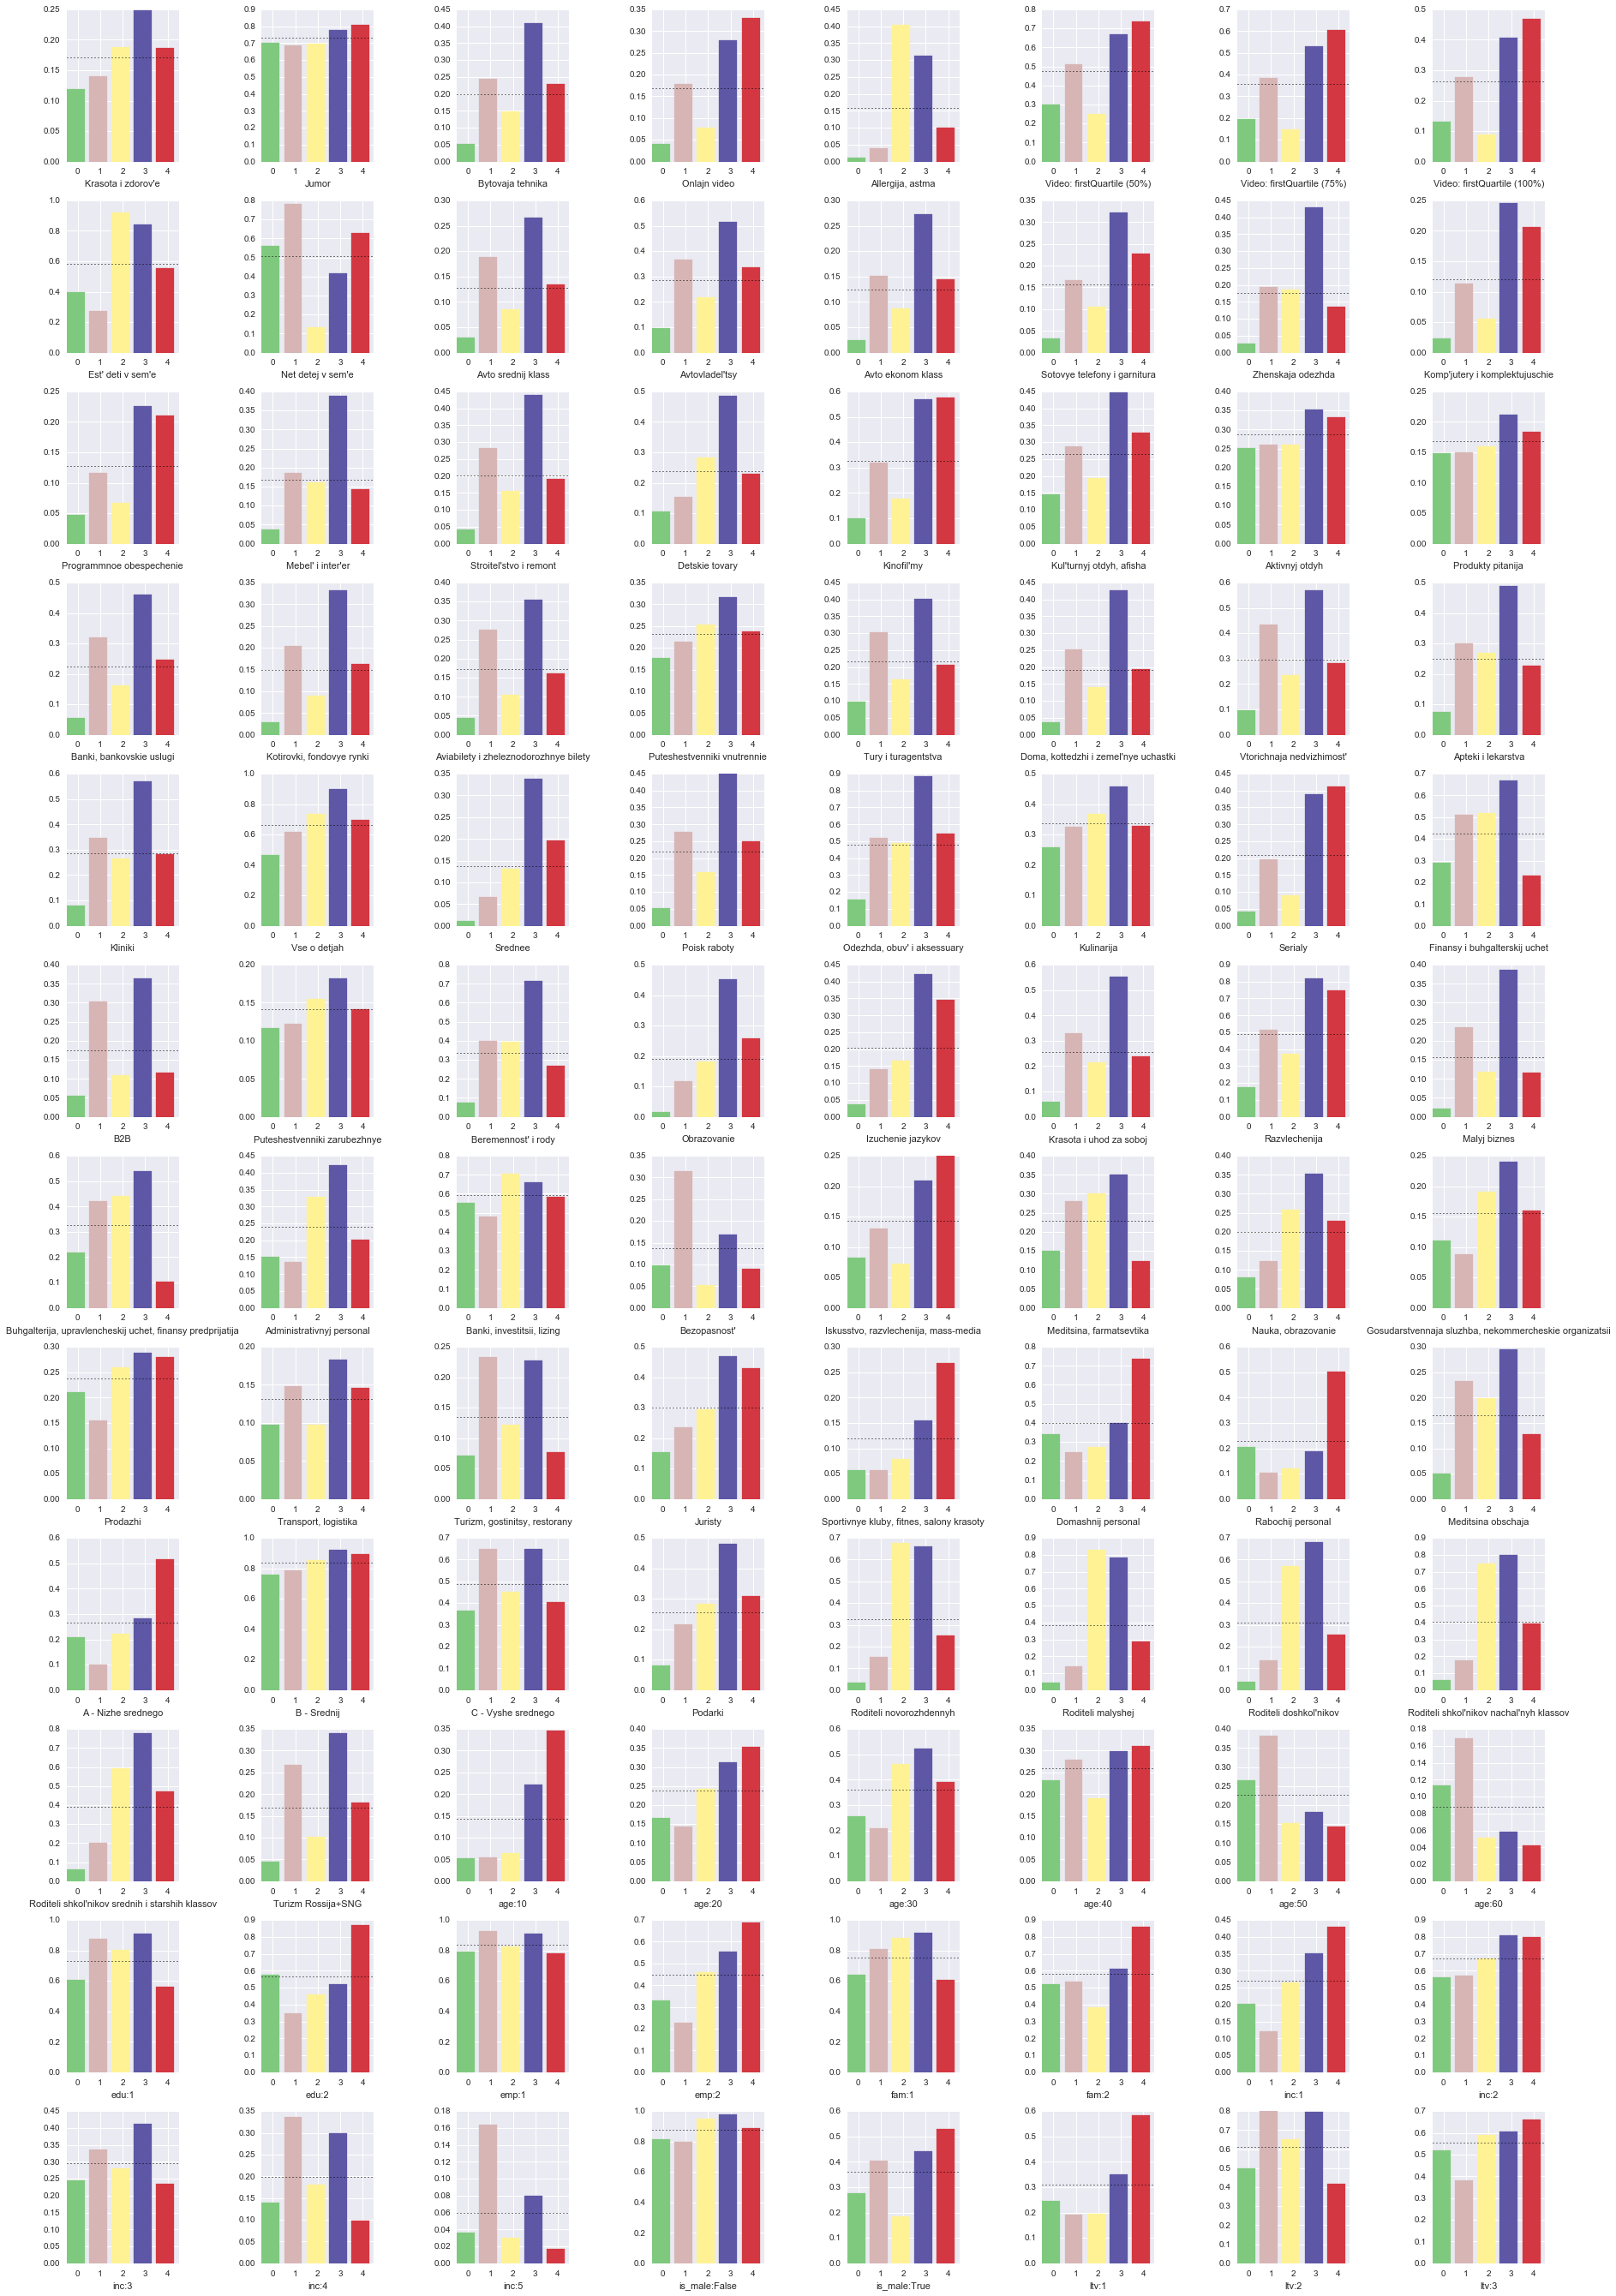

In [21]:
from transliterate import translit

pl.figure(figsize=(26, 40))
for i in xrange(cl.n_interests):
    pl.subplot(cl.n_interests / 8 + 1, 8, i + 1)
    bars = pl.bar(np.arange(cl.n_classes) - 0.5, cl.I[:, i])
    for c in xrange(cl.n_classes):
        bars[c].set_color(colors[c])
    pl.axhline(1.0 * X[:, i + cl.n_presents].sum() / X.shape[0], lw=1, ls=':', color='k')
#     pl.ylim(0, 1)
    pl.xlim(-0.5, cl.n_classes - 0.5)
    col = new_columns[i + cl.n_presents]
    pl.xlabel(translit(targets.get(col, col).decode('utf-8'), reversed=True))
pl.tight_layout()
pl.show()

## Оптимизируем выдачу

In [139]:
for c in xrange(cl.n_classes):
    res = sop.linprog(
        -cl.P[c] * top_presents,
        A_eq=np.ones((1, cl.n_presents)), b_eq=np.ones(1), 
        bounds=(0, 1)
    )
    if res.success:
        print "Class: %d -> %s // %s" % (c, res.x,  P[c])
    else:
        print "FAIL"

Class: 0 -> [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] // [  9.00088600e-01   4.45675740e-02   1.16665322e-02   5.86678044e-03
   1.63184168e-02   2.04024178e-03   1.19098240e-03   3.56894142e-03
   9.03037794e-04   1.35909666e-02   1.97926206e-04]
Class: 1 -> [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.] // [  8.95540483e-01   5.25687872e-02   1.17249602e-02   4.28647753e-03
   1.70461023e-02   1.84200645e-03   1.15176313e-03   2.56715314e-03
   9.92563083e-04   1.19088306e-02   3.70873337e-04]
Class: 2 -> [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] // [ 0.51050356  0.15720514  0.06402721  0.02538107  0.0849926   0.01423463
  0.00927649  0.02435088  0.00908144  0.09777333  0.00317365]


In [61]:
def f_opt(p, Pi, s, m=5):  
    s1 = 0.0
    p_neg_k = 1.0
    p_neg_1 = 1 - np.dot(p, Pi)
    for k in xrange(0, m):
        s1 += p_neg_k
        p_neg_k *= p_neg_1
        
    s2 = np.sum(p * Pi * s)
    
    s3 = 0.0
    p_neg_k = 1.0
    for k in xrange(1, m):
        s3 += k * p_neg_k
        p_neg_k *= p_neg_1   
    
    return -s1 * s2, -Pi * (s * s1 - s3 * s2)

p0 = np.ones(len(top_presents), dtype=float) / len(top_presents) 
# f, g = f_opt(p0, P[0], np.array(top_presents))

# delta = np.random.random(len(top_presents)) * 0.01
# f1, g1 = f_opt(p0 + delta, P[0], np.array(top_presents))
# print f, f + np.sum(delta * g), f1

for c in xrange(n_classes): 
    res = sop.minimize(
        lambda p: f_opt(p, P[c], np.array(top_presents), m=10), p0, 
        method='SLSQP', jac=True, 
        bounds=[(0, 1)] * len(top_presents), 
        constraints={'type': 'eq', 'fun': lambda p: np.sum(p) - 1}
    )
    if res.success:
        print "Class: %d -> %s // %s" % (c, res.x,  P[c] * top_presents)
    else:
        print "FAIL"

Class: 0 -> [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.] // [ 0.9000886   0.08913515  0.0349996   0.02346712  0.08159208  0.01428169
  0.01190982  0.05353412  0.01806076  0.47568383  0.00989631]
Class: 1 -> [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.] // [ 0.89554048  0.10513757  0.03517488  0.01714591  0.08523051  0.01289405
  0.01151763  0.0385073   0.01985126  0.41680907  0.01854367]
Class: 2 -> [  6.37323527e-13   3.08836290e-13   1.85865212e-13   1.91152649e-13
   5.39429612e-14   1.74735226e-13   1.71196390e-13   9.54791801e-15
   1.06400999e-13   1.00000000e+00   1.16073817e-13] // [ 0.51050356  0.31441028  0.19208162  0.10152426  0.424963    0.09964244
  0.09276493  0.36526326  0.18162874  3.4220666   0.1586827 ]
Class: 3 -> [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.] // [ 0.77806125  0.19115322  0.08323115  0.04239155  0.19792865  0.03486167
  0.03249897  0.13988756  0.03396775  1.00074876  0.0293813 ]
Class: 4 -> [  6.80011603e-16   8.04911693e-16   0.00000000e+00   0.000

### Генетический алгоритм

In [138]:
def sample(slots, prob, alpha=0.0):
    p = np.copy(prob)
    for s in xrange(len(slots)):
        # print "%s : %.3f" % (p, 1-np.sum(p))
        # Exit probability
        if np.random.random() <= (1 - np.sum(p)):
            return 0            
        elif np.random.random() <= p[slots[s]]:
            return top_presents[slots[s]]
        else:
            p[slots[s]] *= 1 - alpha            
    return 0

def fitness(slots, prob, alpha=0.0, min_iter=1000, max_iter=20000, epsilon=1e-3):
    s_prev = 0.0
    s_curr = 0.0
    for i in xrange(1, max_iter + 1):
        s_curr += sample(slots, prob, alpha=alpha)       
        
        if i % min_iter == 0 and (abs(s_curr - s_prev) / i) < epsilon:            
            return s_curr / i
        else:
            s_prev = s_curr
            
    print "WARN: No convergence"
    return s_curr / i

def random_slots(n_slots)
    return np.random.randint(0, len(top_presents), size=n_slots)

def crossover(slots1, slots2, p=0.5):
    n_slots = len(slots1)
    
    slot = np.copy(slots1)
    
    cross_ind = np.random.choice(np.arange(n_slots), size=int(p * n_slots), replace=False)
    slot[cross_ind] = slots2[cross_ind]
    
    return slot

def mutate(slots, p=0.1):    
    return crossover(slots, , p)

prob = cl.P[1]
alpha = 0.1

n_slots = 10
n_gens = 10

n_survivors = n_crossover = n_mutation = n_random = 5

generation = np.random.randint(0, len(top_presents), size=(n_survivors + n_crossover + n_mutation + n_random, n_slots))

# select fittest
fits = [fitness(slots, prob, alpha=alpha) for slots in generation]
survivors = generation[np.argsort(fits)[-5:][::-1]]

# crossover
pairs = [(i, j) for (i, j), v in np.ndenumerate(np.ones((n_survivors, n_survivors))) if i < j]
pair_ind = np.random.choice(np.arange(len(pairs)), size=n_crossover, replace=False)
for ind in pair_ind:
    i, j = pairs[ind]
    generation[ind + n_survivors] = crossover(survivors[i], survivors[j])
    
for ind in xrange(n_mutation):
    generation[ind + n_survivors + n_crossover] = mutate(survivors[ind])
    
for ind in xrange(n_random):
    generation[ind + n_survivors + n_crossover] = mutate(survivors[ind])

[(2, 3), (0, 4), (0, 2), (3, 4), (1, 4)]
